# NGC  group


# Issues

* profiles in mstar and sfr stop when photutils hits a nan
* but this is not good for big spirals like VFID5889-NGC5364 - there are nans inbetween spiral arms
* could save linear rather than log.


### NOTES 2024-Mar-22 

* loosing my mind b/c SFR images are for some reason a factor of 10 lower than they were a few days ago
* I figured out why the mstar image contours were suddenly noisy - I had commented out the convolution line in the make_mstar_image.py.  This now works ok.



In [71]:
import os
import numpy as np
from matplotlib import pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS

from PIL import Image

import glob
homedir = os.getenv("HOME")

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plotdir = homedir+'/research/Virgo/plots/halpha/'

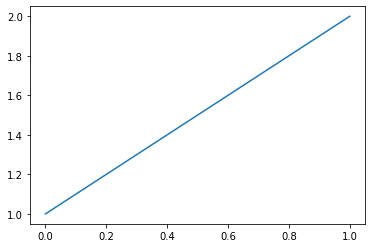

In [2]:
%matplotlib inline
plt.figure()
plt.plot([1,2])

In [3]:
%run ~/github/Virgo/programs/readtablesv2.py

<Figure size 432x288 with 0 Axes>

# Galaxies for NGC Group

* need to fix code to handle offcenter galaxies

* add SNR cut to the sSFR image
  * create object mask
  * calc std in remaining pixels
  * cut sSFR and SNR > 3
* [link to slides](https://docs.google.com/presentation/d/1DXOzvhq8jZzwO3-u1x7ts6d-fUNfM42bwe1AlhGKusA/edit?usp=sharing) on NGC 5364 Group

* syncing files from draco to adjust continuum subtraction.

```
rsync -avz --exclude="mastDownload" /data-pool/Halpha/halphagui-output-20240104/cutouts/VFID5851* .
```
### Members

|VFID|	NED Name| INT | HDI | Comments
|------|------|----|---|----|
|VFID5889|	NGC 5364|x | x|Primary spiral |
|VFID5892|	NGC 5360|x | x| truncated|
|VFID5842|	NGC 5356|x |x |Truncated|
|VFID5851|	NGC 5363| x| x| Elliptical, saturated in legacy,so g-r correction does not work |
| | | | |Looks like there is structure - should try with CS.fits|
|VFID5855|	NGC 5348|X | NA |extraplanar |
|VFID5844|	SDSSJ| x| x|smudge |
|VFID5859|	WISEJ|X |X |HI tail; halpha concentrated on opposite edge |
|VFID5868|	SDSSJ| x| x| can't see it in continuum|
|VFID5879|	SDSSJ|x |x |really no halpha |

In [ ]:
vfid_group_membs = [5842,5844,5851,5855,5859,5868,5879,5889,5892]

In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py
#groupFlag = np.zeros(len(v.main),'bool')
#for vf in vfid_group_membs:
#    groupFlag[vf]=True

v.kt[5889]

In [ ]:
groupMembs = v.kt['PGC1'] == 49547
print(f"number of Kourkchi group members = {np.sum(groupMembs)}")
v.kt[groupMembs]

# Lower mass galaxies

* need to add lower-mass galaxies for comparison with Lizhi's models
* she predicts that lower-mass galaxies will have no SF is RPS is acting

In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py
flag = groupMembs & v.main['HAobsflag']
col_formats={'XCENTER': '%12.1f',
                                             'YCENTER': lambda x: round(x, 1)}
paperTab = Table([v.main['VFID'],v.main['NEDname'],v.main['vr'],v.magphys['logMstar_med'],v.magphys['logSFR_med'],v.magphys['logsSFR_med'],v.paper1['H2def'],v.paper1['HIdef'],v.a100['HIdef_bos']])[flag]
paperTab.write(plotdir+'/NGC5364_tab1.tex',format='latex')

In [ ]:
%run ~/github/havirgo/python/hafunctions.py

In [ ]:
v.get_group_members()
v.write_latex_table()

In [ ]:
!more $plotdir/NGC5364_tab1.tex

In [ ]:
v.paperTab['H2def'][1]

# Image Processing

* subtract continuum
* make mstar and sfr images
* get photometry from CS-gr image
* get mstar_sfr photometry
* plot results from mstar and sfr photometry (superceded by other scripts now)



In [ ]:
def get_images(dirname,scalefactor=1):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    # add scale factor for continuue after the directory name
    %run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    %run ~/github/havirgo/python/make_mstar_image.py $dirname 
    %run ~/github/havirgo/python/hafunctions.py 
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    #plot_mstar_sfr(dirname)
    #os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    #%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    %run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
    #os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    #%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
    plt.show()
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

# VFID5851 - NGC 5363

Elliptical

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5851-NGC5363-HDI-20180313-p056'
scalefactor = 1.0
#%run ~/github/havirgo/python/reproject_images_2ha.py $dirname
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5851-NGC5363-INT-20190206-p120'
scalefactor = .95
#%run ~/github/havirgo/python/reproject_images_2ha.py $dirname
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

dirname = 'VFID5842-NGC5356-INT-20190206-p120'
xmin,xmax=900,1300
ymin,ymax = 700,1450


scalefactor = 1
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/ngc5364paper.py
plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=True)


dirname = 'VFID5842-NGC5356-HDI-20180313-p056'
xmin,xmax=700,1000
ymin,ymax = 550,1130


scalefactor = 1
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/ngc5364paper.py
plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=True)

In [ ]:
# leaving this for comparison - don't rerun

# the SFR values are a factor of 10 lower than they were -don't know why yet
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

dirname = 'VFID5842-NGC5356-INT-20190206-p120'
xmin,xmax=900,1300
ymin,ymax = 700,1450

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=True)


dirname = 'VFID5842-NGC5356-HDI-20180313-p056'
xmin,xmax=700,1000
ymin,ymax = 550,1130

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=True)

In [ ]:
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
xmin,xmax=820,1200
ymin,ymax = 700,1400
plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4.],contourFlag=True)

In [ ]:
dirname = 'VFID5889-NGC5364-INT-20190206-p120'
xmin,xmax=100,1300
ymin,ymax = 850,2100

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,5.5],cbfrac=.045,clevels=[4.5],contourFlag=True)

dirname = 'VFID5889-NGC5364-HDI-20180313-p056'

xmin,xmax=250,1200
ymin,ymax = 750,1700

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,5.5],cbfrac=.045,clevels=[3.],contourFlag=True)


In [ ]:
dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'
xmin,xmax=50,150
ymin,ymax = 30,145

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,5],cbfrac=.05,contourFlag=True,clevels=[3.55])


dirname = 'VFID5859-WISEAJ135504.45+051121.7-HDI-20180313-p056'
xmin,xmax=35,115
ymin,ymax = 25,115

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,5],cbfrac=.05,contourFlag=True,clevels=[3.55])

In [ ]:
dirname = 'VFID5892-NGC5360-INT-20190206-p120'
xmin,xmax=240,780
ymin,ymax = 250,690
#ymin,ymax = 300,620
plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,4.5],cbfrac=.055,cbaspect=10,contourFlag=True,clevels=[4.3])



dirname = 'VFID5892-NGC5360-HDI-20180313-p056'
xmin,xmax=200,600
ymin,ymax = 190,550

plot_mstar_sfr(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,4.5],cbfrac=.08,cbaspect=10,contourFlag=True,clevels=[3.6])


# area around group


In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py

In [ ]:
vfid = dirname.split('-')[0]
print(vfid)

In [ ]:
gindex = np.arange(len(v.main))[v.main['VFID'] == vfid][0]
print(gindex)

In [ ]:
def plot_positions(dr=5,vfindex=5889):

    ragroup = v.main['RA'][vfindex]
    decgroup = v.main['DEC'][vfindex]
    plt.figure(figsize=(8,6))
    
    spinedir = '/home/rfinn/research/Virgo/tables-north/v2/spines/'
    spine  = Table.read(spinedir+'filament_spine_VirgoIII.fits')
    plt.plot(spine['ra'],spine['dec'],'k--',label='Filament Spine')
    
    
    flag = (np.abs(v.main['RA']-ragroup) < dr) &  (np.abs(v.main['DEC']-decgroup) < dr) 
    plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.env['Vmodel'][flag],s=1.5*v.main['radius'][flag],vmin=700,vmax=2500)

    hflag = flag & v.main['HAobsflag']
    plt.plot(v.main['RA'][hflag],v.main['DEC'][hflag],'r.',label=r'$\rm Observed \ in \ H\alpha$')
    cb=plt.colorbar(label='Vmodel (km/s)')
    cb.ax.tick_params(labelsize=12)
    cb.set_label(label='Vmodel (km/s)',size=16)
    
    
    xmin = ragroup - dr
    xmax = ragroup + dr

    ymin = decgroup - dr
    ymax = decgroup + dr

    plt.axis([xmax,xmin,ymin,ymax])

    plt.xlabel('RA (deg)',fontsize=16)
    plt.ylabel("Dec (deg)",fontsize=16)
    plt.legend()
    

        
    plt.figure()
    plt.hist(v.main['vr'][flag])
    plt.xlabel('$v_r \ (km/s)$',fontsize=16)
    plt.show()

In [ ]:
plot_positions(dr=15)

In [ ]:
plot_positions(dr=1.5)

In [ ]:
v.main['vr'][5889]

In [ ]:
v.env[5889]

# phase space diagram

In [ ]:
# read in tempel group file
infile = homedir+'/research/Virgo/NGC5364-group/Tempel2017-table1-groupMembers.fits'
ttab = Table.read(infile)
ttab

In [ ]:
TgroupMemb = np.zeros(len(v.main),'bool')
for vfid in ttab['VFID']:
    TgroupMemb[v.main['VFID'] == vfid] = True
    
    
# get mass weighted center
badMassFlag = v.magphys['logMstar_med'] < 2

combinedMass = v.magphys['logMstar_med'] * ~badMassFlag + v.magphys['logMstar_best'] * badMassFlag

combinedMass[TgroupMemb]


# calculate the mass-weighted center

RAcenter = np.sum(v.main['RA'][TgroupMemb]*combinedMass[TgroupMemb])/np.sum(combinedMass[TgroupMemb])
print(RAcenter)

DECcenter = np.sum(v.main['DEC'][TgroupMemb]*combinedMass[TgroupMemb])/np.sum(combinedMass[TgroupMemb])
print(DECcenter)


vrcenter = np.sum(v.main['vr'][TgroupMemb]*combinedMass[TgroupMemb])/np.sum(combinedMass[TgroupMemb])
print(vrcenter)

# Tempel value for group
print(0.004089*3e5)

In [ ]:
# compare temple and our vr
plt.figure()
plt.plot(ttab['vr'],ttab['col8']*3.e5,'bo')
xline = np.linspace(800,1500,100)
plt.plot(xline,xline,'k--')
plt.axvline(x=0.004089*3.e5,ls='--',color='k')
plt.figure()
plt.hist(ttab['col8'])
plt.axvline(x=0.004089,ls='--',color='k')

print(f"average vr of group members = {np.mean(ttab['vr']):.1f}")

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(8,6)) 
# syntax for 3-D projection 
#ax = plt.axes(projection ='3d') 
    
dr = 1.5
ragroup = v.main['RA'][5889]
decgroup = v.main['DEC'][5889]

# use center of group from Tempel
ragroup = 208.821650229
decgroup =5.170919533 
zgroup = 0.004089 #± .00064
#zcmbgroup = 0.004987

# using average vr
groupsigma = 198
flag = (np.abs(v.main['RA']-ragroup) < dr) &  (np.abs(v.main['DEC']-decgroup) < dr)
flag = np.sqrt((v.main['RA']-ragroup)**2 +  (v.main['DEC']-decgroup) **2) < dr 

dr = np.sqrt((v.main['RA']-ragroup)**2 +  (v.main['DEC']-decgroup) **2)
dv = (v.main['vr'] - zgroup*3e5)/groupsigma

dr = np.sqrt((v.main['RA']-RAcenter)**2 +  (v.main['DEC']-DECcenter) **2)
dv = (v.main['vr'] - vrcenter)/groupsigma

# plot phase space
#plt.plot(dr[flag],dv[flag],'ko',alpha=.2)

HIflag = v.a100['logMH'] > 1
fracHI = v.a100['logMH'] - combinedMass 

plt.scatter(dr[flag  & TgroupMemb],dv[flag & TgroupMemb],c='k',alpha=.2,s=50)
plt.scatter(dr[flag & HIflag & TgroupMemb],dv[flag & HIflag & TgroupMemb],c=fracHI[flag & HIflag & TgroupMemb],s=50)
cb = plt.colorbar(label='$\log(M_{HI}/M_\star)$')

cb.set_label(label='$\log(M_{HI}/M_\star)$',fontsize=14)
plt.axhline(y=0,ls='--',color='k')
plt.xlabel("Projected Radius (deg)",fontsize=20)
plt.ylabel("$(vr - v_{center})/\sigma_v$ ",fontsize=20)
#clipflag = (v.env['filament'] == 'VirgoIII') & (v.env['filament_member'])
#ax.plot3D(v.env['SGX'][clipflag], v.env['SGY'][clipflag], v.env['SGZ'][clipflag],'c.',color='0.5',alpha=.5) 


ids =  np.arange(len(v.main))[TgroupMemb]
for i in ids:

    plt.text(dr[i]-.02,dv[i]+.2,v.main['VFID'][i])
plt.ylim(-3,3)
plt.xlim(0,1.1)
#cb = fig.colorbar(p,fraction=.03,pad=.1)
#cb.ax.tick_params(labelsize=12)
#cb.set_label(label=colorname,size='large')
plt.savefig(plotdir+'/NGC5346-phasespace.png')

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
plot_phase_space_normalized()

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
plot_phase_space_normalized()

In [ ]:
#%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py
%matplotlib inline
fig = plt.figure(figsize=(6.5,5.5)) 
plt.subplots_adjust(left=.05,top=0.95,bottom=.05,right=.88)
# syntax for 3-D projection 
ax = plt.axes(projection ='3d') 
    
dr = .6
ragroup = v.mw_RAcenter
decgroup = v.mw_DECcenter
flag = (np.abs(v.main['RA']-ragroup) < dr) &  (np.abs(v.main['DEC']-decgroup) < dr) 
flag = np.sqrt((v.main['RA']-ragroup)**2 +  (v.main['DEC']-decgroup) **2) < dr 



clipflag = (v.env['filament'] == 'VirgoIII') & (v.env['filament_member'])
ax.plot3D(v.env['SGX'][clipflag], v.env['SGY'][clipflag], v.env['SGZ'][clipflag],'c.',color='0.5',alpha=.5) 
#ax.set_title(filament_string.replace('_',' ').replace('-',' '),fontsize=20)
ax.set_xlabel('$SGX/h_{74}$',fontsize=20)
ax.set_ylabel('$SGY/h_{74}$',fontsize=20)
ax.set_zlabel('$SGZ/h_{74}$',fontsize=20)


spinedir = '/home/rfinn/research/Virgo/tables-north/v2/spines/'
spine  = Table.read(spinedir+'filament_spine_VirgoIII.fits')
ax.plot3D(spine['SGX'], spine['SGY'], spine['SGZ'],color='k')

colorname='vr (km/s)'


flag = v.groupMembs
p = ax.scatter(v.env['SGX'][flag],v.env['SGY'][flag],v.env['SGZ'][flag],c=v.main['vr'][flag],s=1.*v.main['radius'][flag],vmin=700,vmax=1500,alpha=.9)

    

cb = fig.colorbar(p,fraction=.03,pad=.1)
cb.ax.tick_params(labelsize=12)
cb.set_label(label=colorname,size='large')
plt.savefig(plotdir+'/filament_3d.png')

In [ ]:
# checking other nearby group

nedname = 'NGC 5248'
vfindex = v.main['NEDname'] == nedname

In [ ]:
vfindex = np.arange(len(v.main))[vfindex][0]

In [ ]:
plot_positions(dr=5,vfindex=vfindex)

In [ ]:
np.random.random(size=10)


# SFR - Mstar Figure



In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py

In [ ]:
# one galaxy does not have a good logMstar_med
plt.figure()
x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']

magflag = x > 4

flag = magflag
plt.plot(x[flag],y[flag],'k.',alpha=.01)

# plot the group members

for vf in np.arange(len(v.main))[groupMembs]:
    print(vf,v.main['VFID'][vf])
    plt.plot(x[int(vf)],y[int(vf)],'bo',c=mycolors[0])
    plt.text(x[int(vf)]-.2,y[int(vf)]+.2,v.main['VFID'][vf])
    
plt.xlabel("$\log(M_\star/M_\odot)$",fontsize=16)
plt.ylabel("$\log(SFR/(M_\odot/yr))$",fontsize=16)

VFID5851 or NGC5363 does not have logMstar_med magphys results.

This is saturated in g and r at the center

reframing plot to remove that one.

In [ ]:


plt.figure(figsize=(8,6))
plt.subplots_adjust(bottom=.15)

x = v.magphys['logMstar_med']
y = v.magphys['logSFR_med']

magflag = x > 4

flag = magflag
plt.plot(x[flag],y[flag],'k.',alpha=.01)

# plot the group members
nha = 0
nnha = 0
for vf in np.arange(len(v.main))[groupMembs]:
    if vf == 5851:
        print(vf,v.main['VFID'][vf])
        xp = v.magphys['logMstar_best'][int(vf)]
        yp = v.magphys['logSFR_best'][int(vf)]


    else:
        print(vf,v.main['VFID'][vf])
        xp, yp = x[int(vf)],y[int(vf)]
    if v.main['HAobsflag'][vf]:
        if nha == 0:
            label = r"$In \ H\alpha \ FOV$"
            nha += 1
        else:
            label = "_nolegend_"
        #plt.plot(xp,yp,'bs',markersize=12,c='magenta',label=label)
        plt.plot(xp,yp,'bs',markersize=12,c='magenta',label=label)
    else:
        if nnha == 0:
            label = r"$All \ members$"
            nnha += 1
        else:
            label = "_nolegend_"
        plt.plot(xp,yp,'bo',c=mycolors[0],label=label)
    plt.text(xp,yp+.2,v.main['VFID'][vf],horizontalalignment='center') 
plt.xlabel("$\log(M_\star/M_\odot)$",fontsize=22)
plt.ylabel("$\log(SFR/(M_\odot/yr))$",fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.xlim(7,11.1)
plt.savefig(plotdir+'/NGC5364-sfr-mstar.png')

In [ ]:
v.main[5842]

# Plot SFR Indicators

legacy, NUV, halpha, WISE W3

In [ ]:
def plot_sfr_indicators(dirname,xmin=None,xmax=None,ymin=None,ymax=None,xticks=True,figsize=[16,6],cbfrac=.08,cbaspect=20,clevels=[4,5],contourFlag=False):
    %matplotlib inline
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    # add scale factor for continuue after the directory name


    cwd = os.getcwd()
    os.chdir(dirname)
    massim = dirname+"-logmstar-vr.fits"
    sfrim = dirname+"-sfr-vr.fits"
    ssfrim = dirname+"-ssfr.fits"
    mask = dirname+'-R-mask.fits'
    vfid = dirname.split('-')[0]
    print(dirname+'/galex/*nuv*.fits')
    print("sfrim = ",sfrim)
    try:
        nuvim = glob.glob('galex/*nuv*.fits')[0]
    except IndexError:
        nuvim = None
        print("problem getting nuv image ",dirname)
    # look for coadded image first
    t = glob.glob('unwise/*w3-coadd.fits')
    if len(t) > 0:
        w3im = t[0]
    else:
        t = glob.glob(dirname+'/unwise/*w3-img-m.fits')
        w3im = t[0]
        
        
    titles = ['NUV',r'$H\alpha$',r'$WISE \ 12\mu m$']
    #vmin = [2,0,-11.5]
    #vmax = [6,1.e-6,-9]
    allim = [nuvim,sfrim,w3im]
    
    print(nuvim,w3im)
    
    if xmin is not None:
        # get ra  and dec corresponding to xmin,ymin xmax,ymax from sfr image
        # plot the legacy image in panel 1
        xcoords = np.array([xmin,xmax])
        ycoords = np.array([ymin,ymax])

        header = fits.getheader(sfrim)
        wcs = WCS(header)
        sky = wcs.pixel_to_world(xcoords,ycoords)
        print("skycoords = ",sky)
        
    plt.figure(figsize=(figsize[0],figsize[1]))

    plt.subplots_adjust(wspace=0.1)
    maskdat = fits.getdata(mask)

    allax = []
    for i, im in enumerate(allim):
        plt.subplot(1,4,i+2)
        dat = fits.getdata(im)
        
        if dat.shape == maskdat.shape:
            mdat = np.ma.array(dat,mask=maskdat)
        else:
            mdat = dat
        if xmin is None:
            mdat = mdat
        #elif i == 0: # galex images don't have WCS?
        #    mdat = mdat
        elif i in [0,2]: # convert coords for galex and unwise
            print(i,im)
            imwcs = WCS(fits.getheader(im))
            # set limits in ra,dec
            x,y = imwcs.world_to_pixel(sky)
            print(x,y)
            print(int(np.rint(y[0])),int(np.rint(y[1])),int(np.rint(x[0])),int(np.rint(x[1])))
            print(mdat.shape)
            mdat = mdat[int(np.rint(y[0])):int(np.rint(y[1])),int(np.rint(x[0])):int(np.rint(x[1]))] 
        else:
            mdat = mdat[ymin:ymax,xmin:xmax]
            
            
        #plt.imshow(mdat,origin='lower',interpolation='nearest')
        #if i == 2:
        #    plt.imshow(mdat,vmin=vmin[i],vmax=vmax[i],origin='lower',interpolation='nearest')
        #else:
        #    display_image(mdat,percent=99.5,cmap='viridis')#,vmin=vmin[i],vmax=vmax[i])
        display_image(mdat,percent=99.5,cmap='viridis')#,vmin=vmin[i],vmax=vmax[i])
        
        if not xticks: 
            plt.xticks([],[])
            plt.yticks([],[])
        plt.title(titles[i],fontsize=20)
        plt.colorbar(fraction=cbfrac,aspect=cbaspect)
        if i == 1:
            t = dirname.split('-')
            plt.xlabel(t[0]+' '+t[1],fontsize=20)
        # plot contours from mass
        allax.append(plt.gca())
    # plot the legacy image in panel 1
    xcoords = np.array([xmin,xmax])
    ycoords = np.array([ymin,ymax])
    
    # get ramin,ramax and decmin,decmax from SFR image
    sfrim = dirname+"-sfr-vr.fits"
    header = fits.getheader(sfrim)
    wcs = WCS(header)
    sky = wcs.pixel_to_world(xcoords,ycoords)
    
    # read in header from legacy r-band image
    legacyr = glob.glob("legacy/*r.fits")[0]
    #print(legacyr)
    legacy_jpg = legacyr.replace('-r.fits','.jpg')
    jpeg_data = Image.open(legacy_jpg)
    legwcs = WCS(fits.getheader(legacyr))
    # plot jpg as projection of legacy r-band
    plt.subplot(1,4,1,projection=legwcs)
    plt.imshow(jpeg_data)
    # set limits in ra,dec
    x,y = legwcs.world_to_pixel(sky)
    # convert ramin,ramax and decmin,decmax to (x,y)
    plt.axis([x[0],x[1],y[0],y[1]])
    #print(x[0],x[1],y[0],y[1])
    if contourFlag:
        # get contours from logmstar image
        hdu = fits.open(massim)
        contour_data = hdu[0].data
        contour_header = hdu[0].header
        hdu.close()
        mcontour_data = np.ma.array(contour_data,mask=maskdat)
        for ax in allax:
            ax.contour((mcontour_data[ymin:ymax,xmin:xmax]),levels=clevels, colors='k',linestyles='-',linewidths=1)#,transform=ax.get_transform(WCS(contour_header))
    #plt.contour(contour_data[y[0]:y[1],x[0]:x[1]],levels = [4,5,6],colors='c',alpha=0.5)
    plt.title("Legacy grz",fontsize=20)
    # read in the
    plt.savefig(os.path.join(plotdir,dirname)+'-sfr-indicators.png')
    plt.show()

    os.chdir(cwd)

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
sfrim = 'VFID5842-NGC5356-INT-20190206-p120/VFID5842-NGC5356-INT-20190206-p120-sfr-vr.fits'
nuvim = 'VFID5842-NGC5356-INT-20190206-p120/galex/VFID5842-nuv-719.fits'
nuvim = 'VFID5842-NGC5356-INT-20190206-p120/unwise/VFID5842-unwise-w3-coadd.fits'
xmin,xmax=900,1300
ymin,ymax = 700,1450

xcoords = np.array([xmin,xmax])
ycoords = np.array([ymin,ymax])

header = fits.getheader(sfrim)
wcs = WCS(header)
sky = wcs.pixel_to_world(xcoords,ycoords)
print("skycoords = ",sky)

temp = fits.open(nuvim)
header2 = temp[0].header
imwcs = WCS(header2)
print(imwcs)
x,y = imwcs.world_to_pixel(sky)
#print(sky.ra.deg,sky.dec)
#x,y = imwcs.world_to_pixel(sky.ra,sky.dec)

# SFR Indicators Figure

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
VFID5842-NGC5356-INT-20190206-p120/galex/*nuv*.fits
sfrim =  VFID5842-NGC5356-INT-20190206-p120-sfr-vr.fits
galex/VFID5842-nuv-719.fits unwise/VFID5842-unwise-w3-coadd.fits
skycoords =  <SkyCoord (ICRS): (ra, dec) in deg
    [(208.76068566, 5.29824368), (208.72371643, 5.36724449)]>
0 galex/VFID5842-nuv-719.fits
[198.39768048 286.6781238 ] [154.40263736 320.04879517]
154 320 198 287
(479, 479)
2 unwise/VFID5842-unwise-w3-coadd.fits
[114.37574674 162.57342532] [ 90.44690886 180.79655635]
90 181 114 163
(275, 274)


<Figure size 432x288 with 0 Axes>

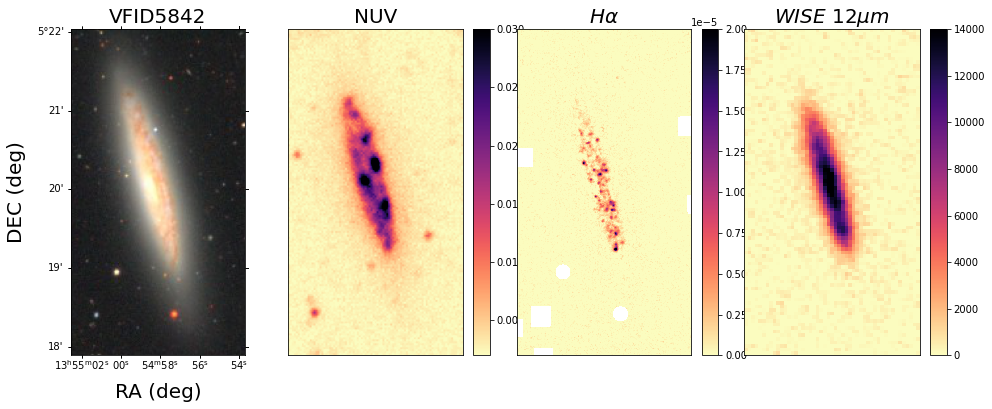

In [63]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/hafunctions.py
dirname = 'VFID5842-NGC5356-INT-20190206-p120'
xmin,xmax=900,1300
ymin,ymax = 700,1450

plot_sfr_indicators(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=False)


dirname = 'VFID5842-NGC5356-HDI-20180313-p056'
xmin,xmax=700,1000
ymin,ymax = 550,1130

#plot_sfr_indicators(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4],contourFlag=False)

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
VFID5892-NGC5360-INT-20190206-p120/galex/*nuv*.fits
sfrim =  VFID5892-NGC5360-INT-20190206-p120-sfr-vr.fits
galex/VFID5892-nuv-320.fits unwise/VFID5892-unwise-w3-coadd.fits
skycoords =  <SkyCoord (ICRS): (ra, dec) in deg
    [(208.93396117, 4.96342147), (208.88409614, 5.00299169)]>
0 galex/VFID5892-nuv-320.fits
[ 52.38502202 171.59590939] [ 54.72050544 149.70558808]
55 150 52 172
(214, 214)
2 unwise/VFID5892-unwise-w3-coadd.fits
[31.32076767 96.36271767] [32.96360814 84.77366442]
33 85 31 96
(122, 122)


<Figure size 432x288 with 0 Axes>

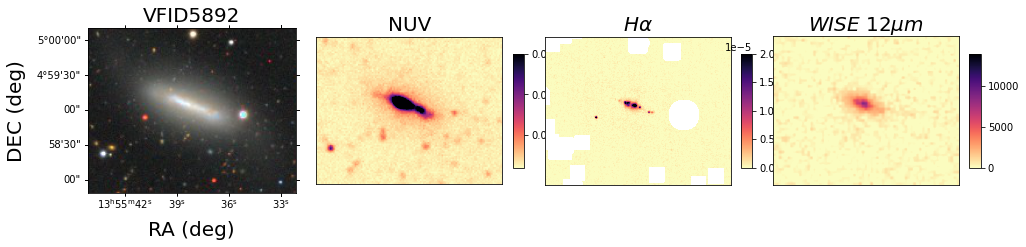

In [64]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/hafunctions.py
dirname = 'VFID5892-NGC5360-INT-20190206-p120'
xmin,xmax=240,780
ymin,ymax = 250,680

plot_sfr_indicators(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,figsize=[16,4.5],cbfrac=.055,cbaspect=10,contourFlag=False,clevels=[3.6])



# HI Deficiency

In [ ]:
v.a100[groupFlag]

NameError: name 'groupFlag' is not defined

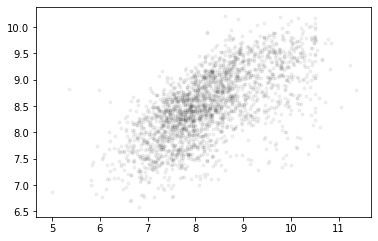

In [141]:
plt.figure()
plt.subplots_adjust(bottom=.15)
flag = (v.magphys['logMstar_med'] > 1 )   & (v.a100['logMH'] > 1)

plt.plot(v.magphys['logMstar_med'][flag],v.a100['logMH'][flag],'k.',alpha=.05)

plt.plot(v.magphys['logMstar_med'][flag & groupFlag],v.a100['logMH'][flag & groupFlag],'bo',alpha=1,color=mycolors[0])

ellipFlag = v.main['VFID'] == 'VFID5851'
plt.plot(v.magphys['logMstar_best'][flag & groupFlag & ellipFlag],v.a100['logMH'][flag & groupFlag & ellipFlag],'bo',alpha=1,color=mycolors[0])
groupIDs = np.arange(len(v.main))[groupFlag & flag]
for i in groupIDs:
    if i == 5851:
        plt.text(v.magphys['logMstar_best'][i]-.2,v.a100['logMH'][i]+.2,v.main['VFID'][i],c='k')
    else:
        plt.text(v.magphys['logMstar_med'][i]-.2,v.a100['logMH'][i]+.2,v.main['VFID'][i],c='k')

plt.xlabel("$\log(M_\star/M_\odot)$",fontsize=16)
plt.ylabel("$\log(M_{HI}/M_\odot)$",fontsize=16)
plt.xlim(7,11)
plt.savefig(plotdir+'/NGC5364-MHI-Mstar.png')

In [ ]:
plt.figure(figsize=(8,6))
plt.subplots_adjust(bottom=.15)
ykey = 'HIdef_bos'


flag = (v.magphys['logMstar_med'] > 1 ) & (v.a100['logMH'] > 0)

plt.plot(v.magphys['logMstar_med'][flag],v.a100[ykey][flag],'k.',alpha=.05)


plt.plot(v.magphys['logMstar_med'][flag & groupMembs & ~v.main['HAobsflag']],v.a100[ykey][flag & groupMembs & ~v.main['HAobsflag']],'bo',alpha=1,color=mycolors[0],label=r"$All \ Members$")


plt.plot(v.magphys['logMstar_med'][flag & groupMembs & v.main['HAobsflag']],v.a100[ykey][flag & groupMembs & v.main['HAobsflag']],'ms',markersize=12,alpha=1,color='fuchsia',label=r"$ On \ H\alpha \ FOV$")


# plot elliptical galaxy - maybe I was doing this to check if it was showing up?
ellipFlag = v.main['VFID'] == 'VFID5851'
plt.plot(v.magphys['logMstar_best'][flag & groupMembs & ellipFlag],v.a100[ykey][flag & groupMembs & ellipFlag],'bo',alpha=1,color=mycolors[0])


# add labels for group galaxies
groupIDs = np.arange(len(v.main))[groupMembs & flag]
for i in groupIDs:
    if i == 5851:
        plt.text(v.magphys['logMstar_best'][i],v.a100[ykey][i]+.2,v.main['VFID'][i],c='k',horizontalalignment='center')
    else:
    
        plt.text(v.magphys['logMstar_med'][i],v.a100[ykey][i]+.2,v.main['VFID'][i],c='k',horizontalalignment='center')


plt.ylabel("${HI}\ Def$",fontsize=22)
plt.xlabel("$\log(M_\star/M_\odot)$",fontsize=22)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(7,11)
plt.axhline(y=0,ls='-')
plt.axhline(y=.3,ls='--')
plt.axhline(y=-.3,ls='--')
plt.legend()
plt.savefig(plotdir+'/HIdef_logMstar.png')

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
5764 VFID5764
5767 VFID5767
5798 VFID5798
5802 VFID5802
HIdef[vf] = 0.9743028718163833
5808 VFID5808
HIdef[vf] = 0.47182094384898754
5818 VFID5818
5842 VFID5842
HIdef[vf] = 0.3472781478380522
5844 VFID5844
5851 VFID5851
5855 VFID5855
HIdef[vf] = 0.0585191876549338
5859 VFID5859
HIdef[vf] = -0.11572162516826623
5869 VFID5869
5879 VFID5879
5889 VFID5889
HIdef[vf] = -0.32055638804846964
5892 VFID5892
HIdef[vf] = 0.7867228826465169
5971 VFID5971
5987 VFID5987


<Figure size 432x288 with 0 Axes>

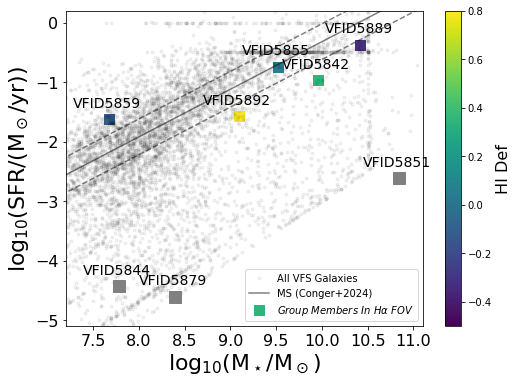

In [12]:
%run ~/github/havirgo/python/hafunctions.py
plot_sfr_mstar()

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
Spearman rank correlation coeff = -0.62, pvalue = 0.269

removing VFID5859
Spearman rank correlation coeff = -0.80, pvalue = 0.200


<Figure size 432x288 with 0 Axes>

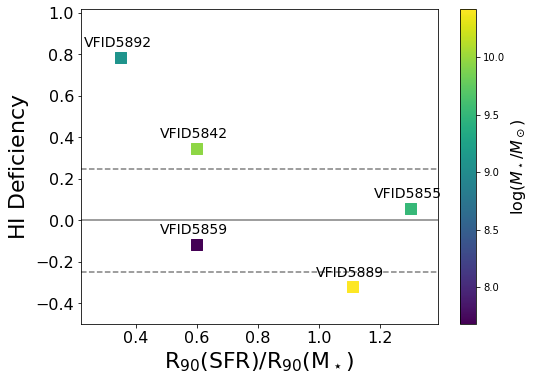

In [71]:
%run ~/github/havirgo/python/hafunctions.py
#plot_sfr_mstar()
plot_HIdef_sizeratio()

In [ ]:
v.a100[groupFlag]

In [ ]:
groupIDs = np.arange(len(v.main))[groupFlag]

Text(0.5, 0, 'HI Def Toribio+2011')

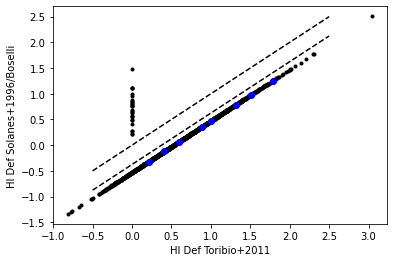

In [158]:
x = v.a100['HIdef'] # Toribio+2011. alfalfa
y = v.a100['HIdef_bos'] # Solanes+1996
plt.plot(x,y,'k.')

plt.plot(x[v.groupMembs],y[v.groupMembs],'bo')
xline = np.linspace(-.5,2.5,100)
plt.plot(xline,xline,'k--',label='1:1')
plt.plot(xline,xline-1.25*np.log10(2),'k--',label='1:1')
plt.ylabel("HI Def Solanes+1996/Boselli")
plt.xlabel("HI Def Toribio+2011")

Text(0.5, 32.99999999999995, 'HI Def Toribio+2011')

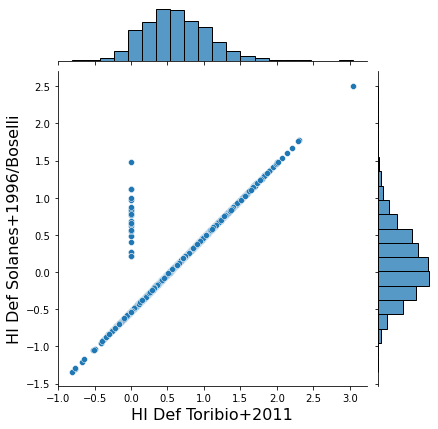

In [180]:
import seaborn as sb
import pandas as pd
flag = v.a100['logMH'] > 0
x = v.a100['HIdef'][flag]#-1.25*np.log10(2) # Toribio+2011. alfalfa
y = v.a100['HIdef_bos'][flag] # Solanes+1996
mytab = Table([x,y],names=['HIdef Toribio+2011','HIdef Solanes+1996'])
mydf = mytab.to_pandas()
sb.jointplot(mydf,x='HIdef Toribio+2011',y='HIdef Solanes+1996',marginal_kws=dict(bins=20))

#plt.plot(x[v.groupMembs],y[v.groupMembs],'bo')
#xline = np.linspace(-.5,2.5,100)
#plt.plot(xline,xline,'k--',label='1:1')
#plt.plot(xline,xline-1.25*np.log10(2),'k--',label='1:1')
plt.ylabel("HI Def Solanes+1996/Boselli",fontsize=16)
plt.xlabel("HI Def Toribio+2011",fontsize=16)


# seems like I have an error in how I calculate HIdef from Toribio+2011
# need to revisit at some point...

Text(0.5, 32.99999999999995, 'HI Def Toribio+2011')

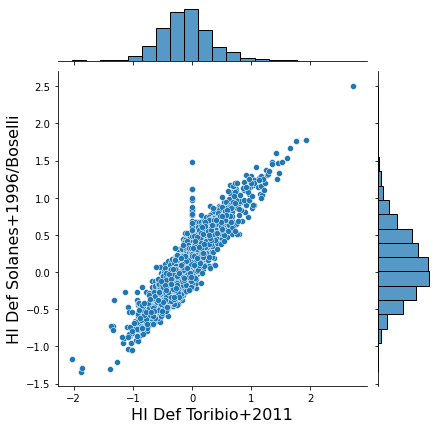

In [177]:
import seaborn as sb
import pandas as pd
flag = v.a100['logMH'] > 0
x = v.a100['HIdef_jon'][flag] # Toribio+2011. alfalfa
y = v.a100['HIdef_bos'][flag] # Solanes+1996
mytab = Table([x,y],names=['HIdef Jones+2018','HIdef Solanes+1996'])
mydf = mytab.to_pandas()
sb.jointplot(mydf,x='HIdef Jones+2018',y='HIdef Solanes+1996',marginal_kws=dict(bins=20))

#plt.plot(x[v.groupMembs],y[v.groupMembs],'bo')
#xline = np.linspace(-.5,2.5,100)
#plt.plot(xline,xline,'k--',label='1:1')
#plt.plot(xline,xline-1.25*np.log10(2),'k--',label='1:1')
plt.ylabel("HI Def Solanes+1996/Boselli",fontsize=16)
plt.xlabel("HI Def Toribio+2011",fontsize=16)

# Lin et al Group Catalog

| | NGC | |
|5842 | NGC5356| |
|5844 | NGC5356| |
|5851 | NGC5356| |
|5855 | PGC| |
|5868 | VVD| |
|5879 | PGC1277985| |
|5889 | NGC5364| |
|5892 | NGC5360| |

In [ ]:
v.main[['VFID','objname']][groupIDs]

| VFID | Objname | Lim Group ID (L)| L+ |  
|VFID5842|	NGC5356| 5515 | 4211
|VFID5844|	SDSSJ135621.34+051944.3|
|VFID5851|	NGC5363|
|VFID5855|	NGC5348|
|VFID5859|	PGC1279452|
|VFID5868|	VVDS140422444|
|VFID5879|	PGC1277985|
|VFID5889|	NGC5364|
|VFID5892|	NGC5360|

# L+ Cagalog
Lim+2017, L+ catalog

## Group ID
group = 4211, 6 members

## Group Properties
* Column (1) group ID: an unique ID of a group within a given group catalog. Note that this cannot be used to cross-identify groups between 2MRS(L), 2MRS(M), 2MRS+(L), and 2MRS+(M), for example. 
* Column (2) cen ID: galaxy ID of the central galaxy of a group in the corresponding galaxy sample; 
* Column (3) ra (in degrees): right ascension (J2000) of the luminosity-weighted group center
* Column (4) dec (in degrees): declination (J2000) of the group center
* Column (5) z: redshift of group center in the CMB rest-frame
* Column (6) log(Mh [Msun/h]): halo mass
* Column (7) N_mem: number of member galaxies
* Column (8) f_edge: the volume fraction that is not cut out from the halo of a group (assumed to be spherical) by the survey boundary or mask
* Column (9) i-o: 
  * 1, if a group is inside the region of completeness for a given halo mass, and thus assigned halo mass by abundance matching
  * 0, if a group is outside the region of completeness, and assigned halo mass using the relation between halo mass and mass proxy from the last iteration of the group finder
* Column (10) known as: conventional name of a system, identified only for well-known massive clusters

```
4211 71189 208.93178 5.12570 0.00525 11.780  7 1.00  1
```

* Indicates that NGC5364 is the central galaxy

# L catalog

## Group ID
group = 5515, 6 members


## Group Properties
* Column (1) group ID: an unique ID of a group within a given group catalog. Note that this cannot be used to cross-identify groups between 2MRS(L), 2MRS(M), 2MRS+(L), and 2MRS+(M), for example. 
* Column (2) cen ID: galaxy ID of the central galaxy of a group in the corresponding galaxy sample; 
* Column (3) ra (in degrees): right ascension (J2000) of the luminosity-weighted group center
* Column (4) dec (in degrees): declination (J2000) of the group center
* Column (5) z: redshift of group center in the CMB rest-frame
* Column (6) log(Mh [Msun/h]): halo mass
* Column (7) N_mem: number of member galaxies
* Column (8) f_edge: the volume fraction that is not cut out from the halo of a group (assumed to be spherical) by the survey boundary or mask
* Column (9) i-o: 
  * 1, if a group is inside the region of completeness for a given halo mass, and thus assigned halo mass by abundance matching
  * 0, if a group is outside the region of completeness, and assigned halo mass using the relation between halo mass and mass proxy from the last iteration of the group finder
* Column (10) known as: conventional name of a system, identified only for well-known massive clusters

```
5515 69677 208.93214 5.12590 0.00525 11.791  6 1.00  1
```

* indicates that NGC5364 is the central galaxy
saved catalog in ~/research/Lim_groups/


# Lim SDSS+M

## Group ID
group = 3432, 7 members

```
3432 71189 208.95732 5.11455 0.00526 11.941  8 1.00  1
```

* VFID5842
* VFID5844
* VFID5859
* VFID5869 - not on Halpha FOV, pretty dwarfy in legacy viewer
* VFID5889
* VFID5892

* VFID5892	208.9113915	4.984993	1174.7	NGC5360	NGC 5360	61077	1237654880734347358	3432	208.91145	4.98505	340.41467	63.08465	0.00484	0.0	1.0	0.0	0.0	8.502	9.019	0.831	0.2934697675164317
* VFID5842	208.7435295	5.3337007	1369.8	NGC5356	NGC 5356	62202	1237654881271152801	3432	208.74355	5.33368	340.52486	63.46812	0.00548	0.0	1.0	0.0	0.0	9.258	9.964	1.003	0.10465471153388382
* VFID5879	208.7612325	5.0903204	1396.6	PGC1277985	SDSS J135502.70+050525.1	71187	1237655126093594752	3432	208.76127	5.09033	340.26289	63.25427	0.00556	0.0	1.0	0.0	0.0	8.006	8.548	0.854	0.13883774887927824
* VFID5889	209.0498895	5.0146562	1239.7	NGC5364	NGC 5364	71189	1237655126093725710	3432	209.04993	5.01486	340.70577	63.03439	0.00513	0.0	1.0	0.0	0.0	9.492	10.293	1.089	0.7479181469475985
* VFID5844	209.0888115	5.3289876	1402.5	SDSSJ135621.34+051944.3	SDSS J135621.31+051944.2	102821	1237654881271349558	3432	209.08882	5.32895	341.16007	63.27535	0.00558	0.0	1.0	0.0	0.0	7.799	8.358	0.869	0.13874657816974129
* VFID5859	208.7687925	5.1894977	1405.3	PGC1279452	WISEA J135504.45+051121.7	114393	1237655126093594767	3432	208.76878	5.18951	340.39664	63.33351	0.00559	0.0	1.0	0.0	0.0	7.787	7.883	0.447	0.06300120164641447
* VFID5869	209.231583	5.1518936	1517.4	PGC049602	CGCG 046-013	114394	1237655126093791380	3432	209.23158	5.15188	341.20535	63.04921	0.00596	0.0	1.0	0.0	0.0	8.456	8.996	0.852	0.05012764795253463


additional galaxy that is not in VF catalogs

(208.82576, 5.06613) - legacy viewer shows a little red dwarf - we probably removed it from the sample

# Lim 2MRS

## MRS+L
VFID5889-NGC5364: group id = 1125 ( 4 members)

* VFID5842
* VFID5851
* VFID5889
* VFID5892

```
1125 98 209.01903 5.18582 0.00484 12.272  4 1.00  1

```

VFID5885-NGC5348: group id = 31706 (only 1 member?)

```
31706 23209 208.54692 5.22720 0.00574 10.952  1 1.00  0
```

## MRS+L

VFID5889-NGC5364: group id= 1002, ngal=451
```
1002 98 209.01556 5.18815 0.00484 12.227  4 1.00  1
```
* VFID5842
* VFID5851
* VFID5889
* VFID5892

VFID5885-NGC5348: group id = 32589, col1 id = 23209


```
32589 23209 208.54692 5.22720 0.00574 10.828  1 1.00  0
```

# Kourchi & Tully Catalog

Mem = 129


VFID5855, Mem = 5

In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py

In [ ]:
v.kt[groupIDs]

In [ ]:
v.tempel[groupIDs]

In [ ]:
(13+3/12)*7

In [ ]:
100/7

# Tempel 2MRS Groups

Tempel+
J/A+A/618/A81	79706	0	Bayesian group finder applied to the 2MRS data (Tempel+, 2018)		Clusters_of_galaxies, Galaxies

group = 5022

* VFID5842
* VFID5851
* VFID5855
* VFID5889
* VFID5892


# Tempel SDSS

In [ ]:
v.main[groupIDs]

In [ ]:
v.main['VFID'][1167]

In [ ]:
groupIDs

In [ ]:
plt.figure()
plt.scatter(v.main['RA'][groupIDs],v.main['DEC'][groupIDs],c=combinedMass[groupIDs])

# Full Legacy Image with Halpha and HI Contours



In [ ]:
os.chdir(homedir+'/research/Virgo/NGC5364-group')

In [ ]:
%run ~/github/havirgo/python/ngc5364paper.py

fits_name, jpg_name = get_legacy_images()

In [ ]:
# increasing the size a bit
%run ~/github/havirgo/python/ngc5364paper.py

fits_name, jpg_name = get_legacy_images()

In [ ]:
# figure with JPG and halpha contours

!ls legacy/
legacy_jpg = 'legacy/NGC5364_group-legacy-6326.jpg'
legacy_r = 'legacy/NGC5364_group-legacy-6326-r.fits'

In [ ]:
%run ~/github/Virgo/programs/readtablesv2.py
groupMembs = v.kt['PGC1'] == 49547

In [ ]:
from astropy.nddata import Cutout2D
%run ~/github/havirgo/python/hafunctions.py 
# figure with JPG and halpha contours
os.chdir(homedir+'/research/Virgo/NGC5364-group')
legacy_jpg = 'legacy/NGC5364_group-legacy-6326.jpg'
legacy_r = 'legacy/NGC5364_group-legacy-6326-r.fits'
hdu = fits.open(legacy_r)[0]
legwcs = WCS(hdu.header)


jpeg_data = Image.open(legacy_jpg)
#plt.figure(figsize=(9,7))
plt.figure(figsize=(11,8))
plt.subplots_adjust(left=.1,right=.95)
# plot jpg as projection of legacy r-band
ax = plt.subplot(1,1,1,projection=legwcs)
plt.imshow(jpeg_data,origin='lower')

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

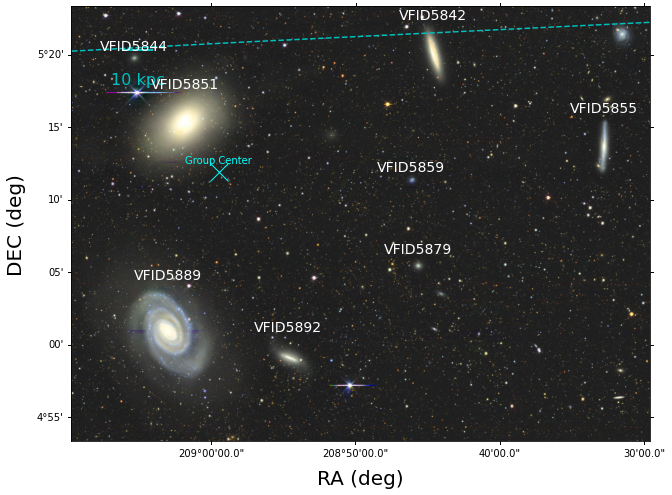

In [72]:
from astropy.nddata import Cutout2D
%run ~/github/havirgo/python/hafunctions.py 
# figure with JPG and halpha contours
os.chdir(homedir+'/research/Virgo/NGC5364-group')
legacy_jpg = 'legacy/NGC5364_group-legacy-6326.jpg'
legacy_r = 'legacy/NGC5364_group-legacy-6326-r.fits'
hdu = fits.open(legacy_r)[0]
legwcs = WCS(hdu.header)


jpeg_data = Image.open(legacy_jpg)
#plt.figure(figsize=(9,7))
plt.figure(figsize=(11,8))
plt.subplots_adjust(left=.1,right=.95)
# plot jpg as projection of legacy r-band
ax = plt.subplot(1,1,1,projection=legwcs)



plt.imshow(jpeg_data,origin='lower')


# for each galaxy, add halpha contours
mylevels = 2**np.arange(2)+1
for i in range(6):
#for i in [1]:
    if i == 0:
        dirname = 'VFID5842-NGC5356-INT-20190206-p120'
        xmin,xmax=900,1300
        ymin,ymax = 700,1450

        mylevels = [1e-5,3e-5]

    elif i == 1:
        dirname = 'VFID5855-NGC5348-INT-20190206-p120'
        xmin,xmax=820,1200
        ymin,ymax = 700,1400
        mylevels = [1e-5]

    elif i == 2:
        dirname = 'VFID5889-NGC5364-INT-20190206-p120'
        xmin,xmax=100,1200
        ymin,ymax = 850,2100
        mylevels = [1e-5,3e-5]
        ymin,ymax=100,1200
        xmin,xmax = 850,2100
        
    elif i == 3:
        dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'
        xmin,xmax=50,150
        ymin,ymax = 30,145
        mylevels = [1e-5,3e-5]

    elif i == 4:
        dirname = 'VFID5892-NGC5360-INT-20190206-p120'
        xmin,xmax=240,780
        ymin,ymax = 300,620
        mylevels = [1e-5,3e-5]
        
    elif i == 5:
        dirname = 'VFID5851-NGC5363-INT-20190206-p120'
        xmin,xmax=240,780
        ymin,ymax = 300,620
        mylevels = [1e-5,3e-5]
           

    #xmin, xmax = None,None
    #ymin, ymax = None,None

    vfid = dirname.split('-')[0]
    HIfilename = HI_file[vfid]
    #if HIfilename is not None:
    #    plot_HI_contours(plt.gca(),HIfilename,color='lightsteelblue')
    #print(dirname)
    #plot_sfr_contours(dirname,ax, legwcs=legwcs,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,levels=mylevels)#,xticks=False,clevels=[4],contourFlag=True)
    

add_spine(ax)
ax.set_xlim(0.5, 2400)#hdu.data.shape[1]//2 - 0.5)
ax.set_ylim(600,2400)#, hdu.data.shape[0]//2 - 0.5)


ra = ax.coords[0]
dec = ax.coords[1]
ra.set_major_formatter('dd:mm:ss.s')

ax.set_xlabel("RA (deg)",fontsize=20)
ax.set_ylabel("DEC (deg)",fontsize=20)

###############################################
# add a physical scale
###############################################
pscale = wcs.utils.proj_plane_pixel_scales(legwcs) # in deg -> arcsec
pscale_arcsec = pscale[0]*3600
add_scale(ax,vr=v.mw_vrcenter,pscale=pscale_arcsec,color='c',barsize=10)


vfids = v.main['VFID'][groupMembs & v.main['HAobsflag']]
#vfids = ['VFID5851','VFID5889','VFID5842','VFID5859','VFID5879','VFID5892','VFID5855']
dec_offset = {'VFID5851':.04,'VFID5889':.06,'VFID5842':.04,'VFID5859':.01,'VFID5879':.015,'VFID5892':.03,'VFID5855':.04,'VFID5844':.01}
ra_offset = {'VFID5851':.0,'VFID5889':0,'VFID5842':.0,'VFID5859':.0,'VFID5879':.0,'VFID5892':.0,'VFID5855':.0,'VFID5844':-.0}
groupMemb = np.zeros(len(v.main),'bool')
for vfid in vfids:
    groupMemb[v.main['VFID'] == vfid] = True

indices = np.arange(len(v.main))[groupMemb]

for i in indices:
    try:
        decoffset = dec_offset[v.main['VFID'][i]]
        raoffset = ra_offset[v.main['VFID'][i]]
    except KeyError:
        print("key error for ",v.main['VFID'][i])
        decoffset = .01
        raoffset = 0
    #plt.text(v.main['RA'][i]+raoffset,v.main['DEC'][i]+decoffset,v.main['prefix'][i],transform=ax.get_transform('world'),color='white',horizontalalignment='center')
    plt.text(v.main['RA'][i]+raoffset,v.main['DEC'][i]+decoffset,v.main['VFID'][i],transform=ax.get_transform('world'),color='white',horizontalalignment='center',fontsize=14)
    
    
# plot mass weighted group center
raoffset=0
decoffset = 0.01
xcolor = 'cyan'
plt.plot(v.mw_RAcenter,v.mw_DECcenter,'wx',color=xcolor,markersize=18,transform=ax.get_transform('world'))
plt.text(v.mw_RAcenter+raoffset,v.mw_DECcenter+decoffset,'Group Center',transform=ax.get_transform('world'),color=xcolor,horizontalalignment='center')
plt.savefig(plotdir+'/Legacy-full-halpha-footprint.png')    
plt.savefig(plotdir+'/Legacy-full-halpha-footprint.pdf')   

In [ ]:

%run ~/github/havirgo/python/hafunctions.py 
# figure with JPG and halpha contours
os.chdir(homedir+'/research/Virgo/NGC5364-group')


infile = HI_file['VFID5889']
print(infile)
hdu = fits.open(infile)[0]
mywcs = WCS(hdu.header)
plt.figure(figsize=(10,8))
ax = plt.subplot(1,1,1,projection=mywcs)
plt.imshow(hdu.data,origin='lower')



lon = ax.coords[0]
lat = ax.coords[1]

lon.set_major_formatter('d.ddd')
lat.set_major_formatter('d.dd')

vfids = ['VFID5851','VFID5889','VFID5892']
for vf in vfids:
    flag = v.main['VFID']==vf
    print(v.main['RA'][flag],v.main['DEC'][flag])
    plt.plot(v.main['RA'][flag],v.main['DEC'][flag],'wo',markersize=25,mfc='None',transform=ax.get_transform('world'))
    
for i in indices:
    try:
        decoffset = dec_offset[v.main['VFID'][i]]
        raoffset = ra_offset[v.main['VFID'][i]]
    except KeyError:
        print("key error for ",v.main['VFID'][i])
        decoffset = .01
        raoffset = 0
    plt.text(v.main['RA'][i]+raoffset,v.main['DEC'][i]+decoffset,v.main['prefix'][i],transform=ax.get_transform('world'),color='white',horizontalalignment='center')

NOTE: there is an alignment issue for NGC5363 with this file compared to the one that I used for the ALMA proposal.



# Overplotting Profiles

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
scalefactor = 1.07
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
# trying with the halpha_filter_cor
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5842-NGC5356-INT-20190206-p120'
scalefactor = 1.06
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

dirname = 'VFID5842-NGC5356-INT-20190206-p120'
xmin,xmax=900,1300
ymin,ymax = 700,1450
os.chdir(dirname)

In [ ]:
import sys
sys.path.append(homedir+'/github/halphagui/')
import fit_profile as fp
from astropy.table import Table

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

dirname = 'VFID5842-NGC5356-INT-20190206-p120'
xmin,xmax=900,1300
ymin,ymax = 700,1450
os.chdir(dirname)

rimage = 'VFID5842-NGC5356-INT-20190206-p120-logmstar-vr.fits'
haimage = 'VFID5842-NGC5356-INT-20190206-p120-sfr-vr.fits'
rphot = 'VFID5842-NGC5356-INT-20190206-p120-logmstar-vr_phot.fits'
haphot = 'VFID5842-NGC5356-INT-20190206-p120-sfr-vr_phot.fits'


rp = Table.read(rphot)
hp = Table.read(haphot)

# use this to run on R and CS Halpha
rphot = 'VFID5842-NGC5356-INT-20190206-p120-R_phot.fits'
haphot = 'VFID5842-NGC5356-INT-20190206-p120-CS-gr_phot.fits'

rp = Table.read(rphot)
hp = Table.read(haphot)

In [ ]:
flag = np.ones(len(hp),'bool')
x = hp['sma_arcsec'][flag]
y = hp['sb'][flag]
plt.plot(x,y,'bo')
plt.xlim(0,120)
plt.axhline()
#plt.gca().set_yscale('log')

In [ ]:
import scipy.optimize
from astropy.modeling import models, fitting, functional_models
#Sersic1D
plt.figure()

#plt.xlim(-5,150)
#plt.ylim(.0004,2)

#flag = rp['sma_arcsec'] < 140
flag = rp['sb'] > 0
x = rp['sma_arcsec'][flag]
y = rp['sb'][flag]

t_init = models.Sersic1D(amplitude=y[0],r_eff=20,n=1,fixed={'n':False})


fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y, maxiter=200)



print(t)
plt.subplot(2,1,2)
plt.plot(rp['sma_arcsec'],rp['sb']/t.amplitude.value,'bo',c=mycolors[0],label='logMstar/1E6')
plt.plot(x,t(x)/t.amplitude.value,label='SERSIC',c=mycolors[1])

popt, pcov = scipy.optimize.curve_fit(fp.sersic,x,y)
yfit = fp.sersic(x,*popt)
#plt.plot(x,yfit/1.e6,'k--')


# fit halpha
flag = (hp['sb'] > 0) #& (hp['sma_arcsec'] > 5)
# force it to fit zeros as well
flag = np.ones(len(hp),'bool')
x = hp['sma_arcsec'][flag]
y = hp['sb'][flag]

h_init = models.Sersic1D(r_eff=20,n=1)#,fixed={'n':True})

fit_t = fitting.LevMarLSQFitter()
h = fit_t(h_init, x, y, maxiter=200)
plt.xlim(0,150)
plt.subplot(2,1,1)
#plt.plot(hp['sma_arcsec'],hp['sb']/h.amplitude.value,'bo',c=mycolors[2],label='SFR/1E-5')
plt.plot(hp['sma_arcsec'],hp['sb'],'bo',c=mycolors[2],label='SFR/1E-5')

#plt.plot(x,h(x)/h.amplitude.value,label='SERSIC',c=mycolors[3])
plt.plot(x,h(x),label='SERSIC',c=mycolors[3])
print(h)

#plt.gca().set_yscale('log')

for i in range(2):
    plt.subplot(2,1,i+1)
    plt.xlim(0,120)
    plt.gca().set_yscale('log')

### Fixing n=1

In [ ]:
import scipy.optimize
from astropy.modeling import models, fitting, functional_models
#Sersic1D
plt.figure()

#plt.xlim(-5,150)
#plt.ylim(.0004,2)

#flag = rp['sma_arcsec'] < 140
flag = rp['sb'] > 0
x = rp['sma_arcsec'][flag]
y = rp['sb'][flag]

t_init = models.Sersic1D(amplitude=y[0],r_eff=20,n=1,fixed={'n':True})


fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y, maxiter=200)



print(t)
plt.subplot(2,1,2)
plt.plot(rp['sma_arcsec'],rp['sb']/t.amplitude.value,'bo',c=mycolors[0],label='logMstar/1E6')
plt.plot(x,t(x)/t.amplitude.value,label='SERSIC',c=mycolors[1])

popt, pcov = scipy.optimize.curve_fit(fp.sersic,x,y)
yfit = fp.sersic(x,*popt)
#plt.plot(x,yfit/1.e6,'k--')


# fit halpha
flag = (hp['sb'] > 0) #& (hp['sma_arcsec'] > 5)
# force it to fit zeros as well
flag = np.ones(len(hp),'bool')
x = hp['sma_arcsec'][flag]
y = hp['sb'][flag]

h_init = models.Sersic1D(r_eff=20,n=1,fixed={'n':True})

fit_t = fitting.LevMarLSQFitter()
h = fit_t(h_init, x, y, maxiter=200)
plt.xlim(0,150)
plt.subplot(2,1,1)
plt.plot(hp['sma_arcsec'],hp['sb']/h.amplitude.value,'bo',c=mycolors[2],label='SFR/1E-5')

plt.plot(x,h(x)/h.amplitude.value,label='SERSIC',c=mycolors[3])
print(h)

#plt.gca().set_yscale('log')

for i in range(2):
    plt.subplot(2,1,i+1)
    #plt.xlim(0,120)
    #plt.gca().set_yscale('log')

### Weight fit by area at each radius


In [ ]:
print(f"logMstar = {v.magphys['logMstar_med'][v.main['VFID']=='VFID5842']}")

Our stellar mass images are smoothed, so they are probably not the best for calculating the effective radius from.

If we use the r-band image instead, then we get a size ratio of 0.71.

|Image | Re (arcsec) |
|----|----|
| R-band | 43.7|
| Mstar | |
| CS-gr | 31.0|
| SFR | |

In [ ]:
d0='VFID5842-NGC5356-INT-20190206-p120' # truncated     
d1='VFID5851-NGC5363-INT-20190206-p120' # elliptical
d2='VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120' # dwarf, stripping
d3='VFID5879-SDSSJ135502.70+050525.1-INT-20190206-p120' # dwarf, no halpha
d4='VFID5892-NGC5360-INT-20190206-p120' # truncated, lower spiral
d5='VFID5844-SDSSJ135621.31+051944.2-INT-20190206-p120' # tiny, N of elliptical
d6='VFID5855-NGC5348-INT-20190206-p120' # extraplanar halpha
d7='VFID5868-SDSSJ135615.94+050954.0-INT-20190206-p120' # tiny, S of elliptical
d8='VFID5889-NGC5364-INT-20190206-p120' # main spiral

alldirs = ['VFID5842-NGC5356-INT-20190206-p120',
'VFID5851-NGC5363-INT-20190206-p120',
'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
'VFID5879-SDSSJ135502.70+050525.1-INT-20190206-p120',
'VFID5892-NGC5360-INT-20190206-p120',
'VFID5844-SDSSJ135621.31+051944.2-INT-20190206-p120',
'VFID5855-NGC5348-INT-20190206-p120',
'VFID5868-SDSSJ135615.94+050954.0-INT-20190206-p120',
'VFID5889-NGC5364-INT-20190206-p120']

# VFID5842-NGC5356

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5842-NGC5356-HDI-20180313-p056'
scalefactor = 1.17
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname

get_images(dirname,scalefactor=scalefactor)

plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5842-NGC5356-HDI-20180313-p056'
t = fit1profile(dirname=dirname,rmax=120)

# INT Data

In [ ]:
# trying with the halpha_filter_cor
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5842-NGC5356-INT-20190206-p120'
scalefactor = 1.06
get_images(dirname,scalefactor=1.06)
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5842-NGC5356-INT-20190206-p120'
t = fit1profile(dirname=dirname,rmax=120)

# VFID5892

## INT Data

In [ ]:
# trying with the halpha_filter_cor
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
dirname = 'VFID5892-NGC5360-INT-20190206-p120'
scalefactor = .98
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 

get_images(dirname,scalefactor=scalefactor)

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
t = fit1profile(dirname=d4,rmax=80)

## HDI data

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5892-NGC5360-HDI-20180313-p056'
scalefactor = 1.08

get_images(dirname,scalefactor=scalefactor)

#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/ngc5364paper.py 
#plot_mstar_sfr(dirname)

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
t = fit1profile(dirname=dirname,rmax=80)

# VFID5889-NGC5364

## INT Data

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5889-NGC5364-INT-20190206-p120'
scalefactor = 1.0
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
get_images(dirname,scalefactor=scalefactor)

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

%run ~/github/havirgo/python/hafunctions.py

#dirname = 'VFID5889-NGC5364-HDI-20180313-p056'
#t = fit1profile(dirname=dirname,rmax=220)

dirname = 'VFID5889-NGC5364-INT-20190206-p120'
t = fit1profile(dirname=dirname,rmax=220)

## HDI Data

In [ ]:
# this is all the commands to get new CS image and mstar/sfr/ssfr profiles
%matplotlib inline

dirname = 'VFID5889-NGC5364-HDI-20180313-p056'
scalefactor = 1.05
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
get_images(dirname,scalefactor=scalefactor)

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')

%run ~/github/havirgo/python/hafunctions.py

dirname = 'VFID5889-NGC5364-HDI-20180313-p056'
t = fit1profile(dirname=dirname,rmax=220)

#dirname = 'VFID5889-NGC5364-INT-20190206-p120'
#t = fit1profile(dirname=dirname,rmax=220)

# VFID5855-NGC5348 : DONE

## INT only

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
scalefactor = 1.08


get_images(dirname,scalefactor=scalefactor)
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
t = fit1profile(dirname=dirname,rmax=150)

# VFID5859 WISEAJ135504.45+051121.7

observed twice

In [ ]:


# trying with the halpha_filter_cor
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5859-WISEAJ135504.45+051121.7-HDI-20180313-p056'
scalefactor = 1.

get_images(dirname,scalefactor=scalefactor)
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
#dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'
dirname = 'VFID5859-WISEAJ135504.45+051121.7-HDI-20180313-p056'
t = fit1profile(dirname=dirname,rmax=35)

In [ ]:
# trying with the halpha_filter_cor
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'
scalefactor = 1.1

get_images(dirname,scalefactor=scalefactor)
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'

t = fit1profile(dirname=dirname,rmax=35)

# VFID5879 SDSSJ135502.70+050525.1

In [ ]:


%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5879-SDSSJ135502.70+050525.1-HDI-20180313-p056'
scalefactor = 1.
get_images(dirname,scalefactor=scalefactor)
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
##%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
#%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5879-SDSSJ135502.70+050525.1-INT-20190206-p120'
scalefactor = .95
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

# VFID5844 - SDSS

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5844-SDSSJ135621.31+051944.2-HDI-20180313-p056'
scalefactor = 1.
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5844-SDSSJ135621.31+051944.2-INT-20190206-p120'
scalefactor = 1
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

# VFID5868 - SDSS


In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5868-SDSSJ135615.94+050954.0-HDI-20180313-p056'
scalefactor = 1.
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
%matplotlib inline
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
# add scale factor for continuue after the directory name
dirname = 'VFID5868-SDSSJ135615.94+050954.0-INT-20190206-p120'
scalefactor = 1.
%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname
plt.show()

In [ ]:
31/37.4

In [ ]:
31.3/36.8

In [ ]:
6.6/25

In [ ]:
7.9/25.9

In [ ]:
79.9/69.4

In [ ]:
113/52

In [ ]:
5.6/9.2

In [ ]:
4.8/8.1

In [ ]:
110/51.8

In [ ]:
86.7/54.3

In [ ]:
%run ~/github/havirgo/python/hafunctions.py

dirname = 'VFID5855-NGC5348-INT-20190206-p120'

plot_mstar_sfr_profiles(dirname,xmin=xmin,xmax=xmax,ymin=ymin,ymax=ymax,xticks=False,clevels=[4.],contourFlag=True,rmax=150)

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
from scipy.integrate import simpson
alldirs = ['VFID5842-NGC5356-INT-20190206-p120',
'VFID5851-NGC5363-INT-20190206-p120',
'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
'VFID5879-SDSSJ135502.70+050525.1-INT-20190206-p120',
'VFID5892-NGC5360-INT-20190206-p120',
'VFID5844-SDSSJ135621.31+051944.2-INT-20190206-p120',
'VFID5855-NGC5348-INT-20190206-p120',
'VFID5868-SDSSJ135615.94+050954.0-INT-20190206-p120',
'VFID5889-NGC5364-INT-20190206-p120']


alldirs = ['VFID5851-NGC5363-INT-20190206-p120',
           'VFID5842-NGC5356-INT-20190206-p120',
'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
'VFID5892-NGC5360-INT-20190206-p120',
'VFID5855-NGC5348-INT-20190206-p120',
'VFID5889-NGC5364-INT-20190206-p120']

scales = {'VFID5842':1.06,'VFID5844':1,'VFID5851':1,'VFID5855':1.08,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':0.95,'VFID5889':1.0,'VFID5892':0.98}

rmax = [200,120,20,100,200,220]

# testing for VFID5855 after updating the mask
alldirs = ['VFID5855-NGC5348-INT-20190206-p120']

rmax = [200]
for i,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #print("rmax = ",i,rmax[i])
    #get_images(d,scalefactor=scales[d.split('-')[0]])
    mfit,sfit,rfit,hfit = fit1profile(dirname=d,rmax=rmax[i])
    
    # get R90 for mstar fit and sfr fit
    #I_mstar = 
    
    m90 = get_rad_fluxfrac(mfit,frac=0.9)
        
    s90 = get_rad_fluxfrac(sfit,frac=0.9)
    print(f"{d.split('-')[0]}: R90_mstar={m90:.1f}, R90_sfr={s90:.1f}, ratio={s90/m90:.2f} \n")
    plot_mstar_sfr_profiles(d,rmax=rmax[i],Re_mstar=mfit.r_eff.value,Re_sfr=sfit.r_eff.value,R90_mstar=m90,R90_sfr=s90)

In [ ]:
plt.close('all')

In [ ]:
N = 10
x = np.linspace(0,N*mfit.r_eff.value,100*N)
flux = mfit(x)*2*np.pi*x*(x[1]-x[0])
integral2 = np.cumsum(flux)
# integrate 
test = simpson(mfit(x*2*np.pi*x),x=x)
integral = [simpson(mfit(x[0:i]*2*np.pi*x[0:i]),x=x[0:i]) for i in np.arange(1,len(x))]

In [ ]:
test

In [ ]:
mfit

In [ ]:
plt.plot(x[1:],integral,'bo')
plt.gca().set_yscale('log')
plt.gca().set_xscale('log')
plt.axhline(test,ls='--')
plt.axhline(0.5*test,ls='--')
plt.axhline(0.9*test,ls='--')

flux = mfit(x)*2*np.pi*x*(x[1]-x[0])
integral2 = np.cumsum(flux)
plt.plot(x,integral2)

In [ ]:
inner = integral2 < 0.5*np.max(integral2)
np.max(x[inner])

# Continuum Subtraction for Elliptical

In [ ]:
topdir = homedir+'/research/Virgo-dev/cont-sub-gr/'
os.chdir(topdir)

dir = 'VFID5851-NGC5363-INT-20190206-p120'

In [ ]:
os.chdir(dir)
%run ~/github/HalphaImaging/python3/uat_subtract_continuum.py --r VFID5851-NGC5363-INT-20190206-p120-R.fits --ha VFID5851-NGC5363-INT-20190206-p120-Ha.fits --scale 0.0385  

In [ ]:
!ls -lth |more

Copying new CS image to CS-gr to work with other plotting code.

In [ ]:
!cp VFID5851-NGC5363-INT-20190206-p120-CS.fits VFID5851-NGC5363-INT-20190206-p120-CS-gr.fits

ran plot_cutouts_ha.py to redownload legacy images, using dr9 instead of dr8

In [ ]:
dirname = 'VFID5851-NGC5363-INT-20190206-p120'
%run ~/github/havirgo/python/reproject_images_2ha.py $dirname

In [ ]:
topdir = homedir+'/research/Virgo-dev/cont-sub-gr/'
os.chdir(topdir)

dirname = 'VFID5851-NGC5363-INT-20190206-p120'
os.chdir(dirname)
%run ~/github/halphagui/remove_from_mask.py VFID5851-NGC5363-INT-20190206-p120-R-mask.fits 587

os.chdir(topdir)

In [ ]:

topdir = homedir+'/research/Virgo-dev/cont-sub-gr/'
os.chdir(topdir)

dirname = 'VFID5851-NGC5363-INT-20190206-p120'

scalefactor = 1.0
#%run ~/github/havirgo/python/subtract_continuum.py $dirname $scalefactor
#%run ~/github/havirgo/python/make_mstar_image.py $dirname 
#%run ~/github/havirgo/python/hafunctions.py 
#os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#plot_mstar_sfr(dirname)
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/get_gr_cont_phot.py $dirname
os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
%run ~/github/havirgo/python/get_mstar_sfr_phot.py $dirname
#os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
#%run ~/github/havirgo/python/plot_mstar_sfr_phot.py $dirname}


os.chdir(topdir)

In [ ]:
10**(.05/2.5)

In [ ]:
test = []

In [ ]:
len(test)

# Updating mask for NGC 5855

* this is at the corner of the INT image - need to mask values that are equal to zero.

In [ ]:
%run ~/github/havirgo/python/hafunctions.py
 
dir = 'VFID5855-NGC5348-INT-20190206-p120'



os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')


maskfile = dir+'/'+dir+'-R-mask.fits'
imfile = dir+'/'+dir+'-R.fits'
himfile = dir+'/'+dir+'-Ha.fits'
print(maskfile)
hdu = fits.open(imfile)
hhdu = fits.open(himfile)
mhdu = fits.open(maskfile)

In [ ]:
plt.figure(figsize=(6,8))
plt.imshow(mhdu[0].data,origin='lower')

In [ ]:
plt.figure(figsize=(6,8))
plt.imshow(hdu[0].data,origin='lower')

In [ ]:
edgemask = hdu[0].data == 0

In [ ]:
plt.imshow(edgemask, origin='lower')

In [ ]:
mhdu[0].data += edgemask

In [ ]:
edgemask = hdu[0].data == 0
hdu[0].data[edgemask] = np.nan

hedgemask = hhdu[0].data == 0
hhdu[0].data[hedgemask] = np.nan

In [ ]:
# write out images, with zeros replaces with nans
fits.writeto(imfile, data=hdu[0].data, header=hdu[0].header, overwrite=True)
fits.writeto(himfile, data=hhdu[0].data, header=hhdu[0].header, overwrite=True)

In [ ]:
plt.imshow(hedgemask,origin='lower')

Set the regions outside the image to nans, and then source extractor behaved fine.

Created a new mask in subdirectory maskdev

then copied is

```
cp SEtestimage-mask.fits ../VFID5855-NGC5348-INT-20190206-p120-R-mask.fits
```

Should also copy the testimage with uncovered pixels equal to nan to source image.

```
cp SEtestimage.fits  ../VFID5855-NGC5348-INT-20190206-p120-R.fits
```

In [ ]:
plt.imshow(mhdu[0].data,origin='lower')

In [ ]:
outfile = maskfile.replace('.fits','-edited.fits')

fits.writeto(outfile, data=mhdu[0].data, header=mhdu[0].header, overwrite=True)

In [ ]:
# write out a mask to use with source extractor

weightim = ~edgemask
plt.imshow(weightim)
plt.colorbar()

In [ ]:
outfile = maskfile.replace('.fits','-SEweight.fits')

fits.writeto(outfile, data=np.array(weightim,'i'), header=mhdu[0].header, overwrite=True)

In [ ]:
os.getcwd()

In [ ]:
outfile

# Rerunning one image

* subtract continuum



In [ ]:
#from scipy.integrate import simpson
import os

%run ~/github/havirgo/python/hafunctions.py


alldirs = ['VFID5851-NGC5363-INT-20190206-p120',
           'VFID5842-NGC5356-INT-20190206-p120',
'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
'VFID5892-NGC5360-INT-20190206-p120',
'VFID5855-NGC5348-INT-20190206-p120',
'VFID5889-NGC5364-INT-20190206-p120']

scales = {'VFID5842':1.06,'VFID5844':1,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':0.95,'VFID5889':1.0,'VFID5892':0.98}

rmax = [200,120,20,100,200,220]

# testing for VFID5855 after updating the mask
alldirs = ['VFID5855-NGC5348-INT-20190206-p120']

rmax = [200]
for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #print("rmax = ",i,rmax[i])
    
    #get_images(d,scalefactor=scales[d.split('-')[0]])
    
    %run ~/github/havirgo/python/hafunctions.py
    
    mfit,sfit,rfit,hfit = fit1profile(dirname=d,rmax=rmax[k])
    
    # get R90 for mstar fit and sfr fit
    #I_mstar = 
    
    m90 = get_rad_fluxfrac(mfit,frac=0.9)
        
    s90 = get_rad_fluxfrac(sfit,frac=0.9)
    
    m50 = get_rad_fluxfrac(mfit,frac=0.5)
        
    s50 = get_rad_fluxfrac(sfit,frac=0.5)
    print(f"{d.split('-')[0]}: R90_mstar={m90:.1f}, R90_sfr={s90:.1f}, ratio={s90/m90:.2f} \n")
    print(f"{d.split('-')[0]}: R50_mstar={m50:.1f}, R50_sfr={s50:.1f}, ratio={s50/m50:.2f} \n")
    #plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=mfit.r_eff.value,Re_sfr=sfit.r_eff.value,R90_mstar=m90,R90_sfr=s90)
    plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=m50,Re_sfr=s50,R90_mstar=m90,R90_sfr=s90)

# Fixing Issues with VFID5855

* try making region in Halpha image nans, and then redo sky subtraction.  sky is coming up zeros so maybe this is because of the external regions.

* this fixed a number of problems
  * mask was much improved - SE could calculate sky noise better
  * my functions to calculate and remove the sky from the r and halpha images worked better.  before it was estimating the sky to be zero in the halpha image, yet there was a residual sky level.  this lead to overestimate of flux and leveling off of the surface brightness at a non-zero values.
  
  
# Fixing center for VFID5851

* updated get_mstar_sfr_phot.py to hold center fixed when working with VFID5851.

In [ ]:
#from scipy.integrate import simpson
import os

%run ~/github/havirgo/python/hafunctions.py


alldirs = ['VFID5851-NGC5363-INT-20190206-p120',
           'VFID5842-NGC5356-INT-20190206-p120',
'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
'VFID5892-NGC5360-INT-20190206-p120',
'VFID5855-NGC5348-INT-20190206-p120',
'VFID5889-NGC5364-INT-20190206-p120']

scales = {'VFID5842':1.06,'VFID5844':1,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':0.95,'VFID5889':1.0,'VFID5892':0.98}

rmax = [160,120,20,100,200,220]



# testing for VFID5855 after updating the mask
alldirs = ['VFID5851-NGC5363-INT-20190206-p120']






rmax = [160]
for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #print("rmax = ",i,rmax[i])
    
    #get_images(d,scalefactor=scales[d.split('-')[0]])
    
    #%run ~/github/havirgo/python/hafunctions.py
    
    mfit,sfit,rfit,hfit = fit1profile(dirname=d,rmax=rmax[k])
    
    # get R90 for mstar fit and sfr fit
    #I_mstar = 
    
    m90 = get_rad_fluxfrac(mfit,frac=0.9)
        
    s90 = get_rad_fluxfrac(sfit,frac=0.9)
    
    m50 = get_rad_fluxfrac(mfit,frac=0.5)
        
    s50 = get_rad_fluxfrac(sfit,frac=0.5)
    print(f"{d.split('-')[0]}: R90_mstar={m90:.1f}, R90_sfr={s90:.1f}, ratio={s90/m90:.2f} \n")
    print(f"{d.split('-')[0]}: R50_mstar={m50:.1f}, R50_sfr={s50:.1f}, ratio={s50/m50:.2f} \n")
    #plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=mfit.r_eff.value,Re_sfr=sfit.r_eff.value,R90_mstar=m90,R90_sfr=s90)
    plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=m50,Re_sfr=s50,R90_mstar=m90,R90_sfr=s90)

# Adding HI Profiles!


* need to add HI profiles to legacy image

# Adding Dwarf Galaxies

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial

####################################'
VFID5842
####################################'

9.957
logMstar = 10.0
number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
120.0
in fit1profile, rmax =  120.0
Ratio of Re(logSFR)/Re(logMstar) = 0.85
Ratio of Re(halpha)/Re(r) = 0.716
cumulative sum of profile = 3.65e+09
cumulative sum of profile = 1.54e-02
VFID5842: R90_mstar=80.8, R90_sfr=48.5, ratio=0.60 

VFID5842: R50_mstar=36.6, R50_sfr=31.1, ratio=0.85 

VFID =  VFID5842

mass contour [6.62386667]
HIfilename =  /home/rfinn/research/Virgo/alma/2023/MeerKAT_ALMA_t

<Figure size 432x288 with 0 Axes>

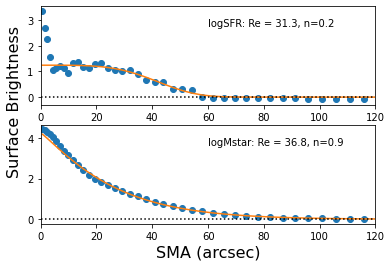

<Figure size 432x288 with 0 Axes>

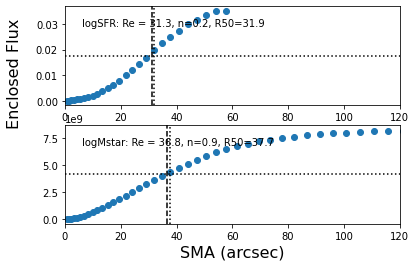

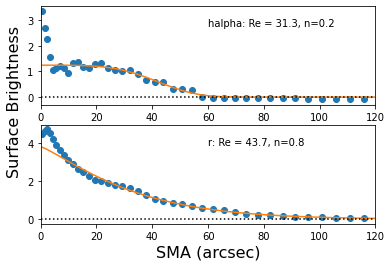

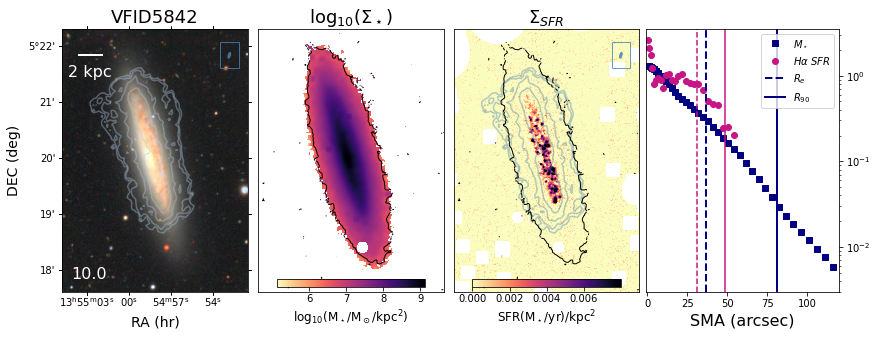

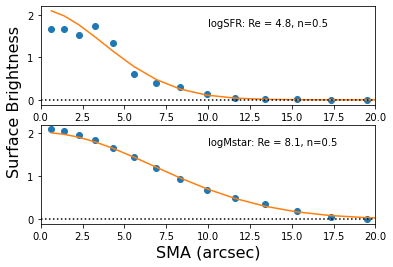

<Figure size 432x288 with 0 Axes>

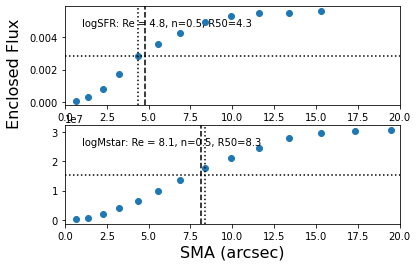

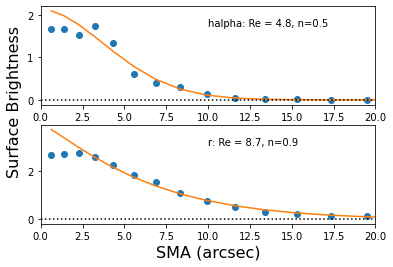

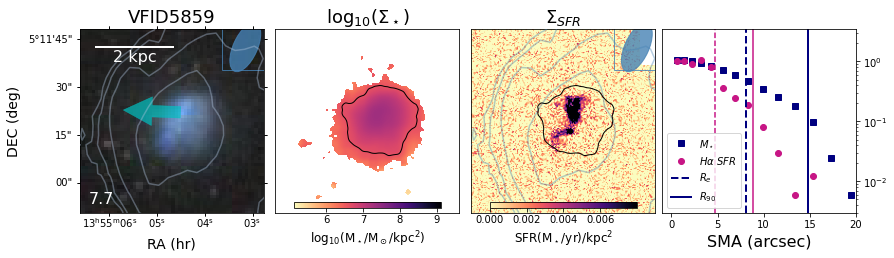

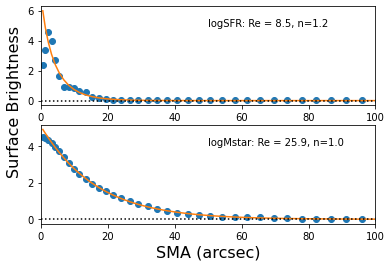

<Figure size 432x288 with 0 Axes>

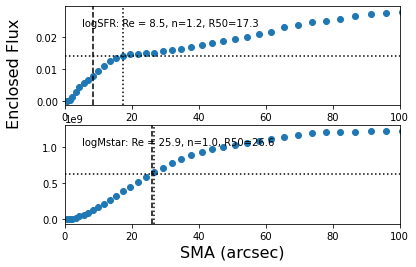

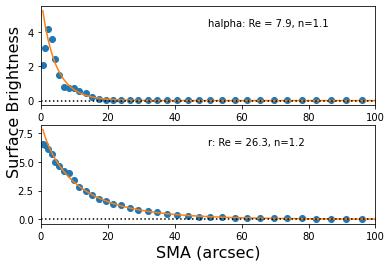

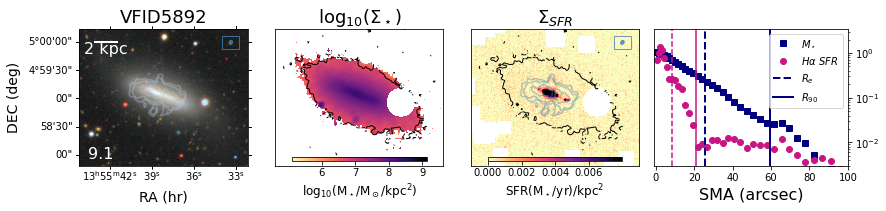

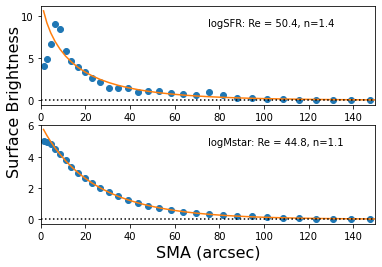

<Figure size 432x288 with 0 Axes>

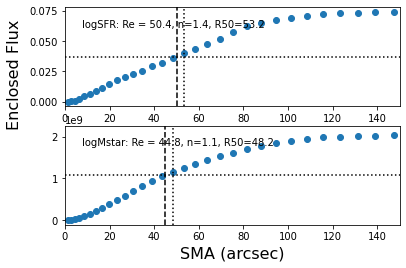

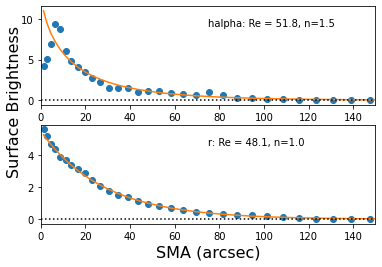

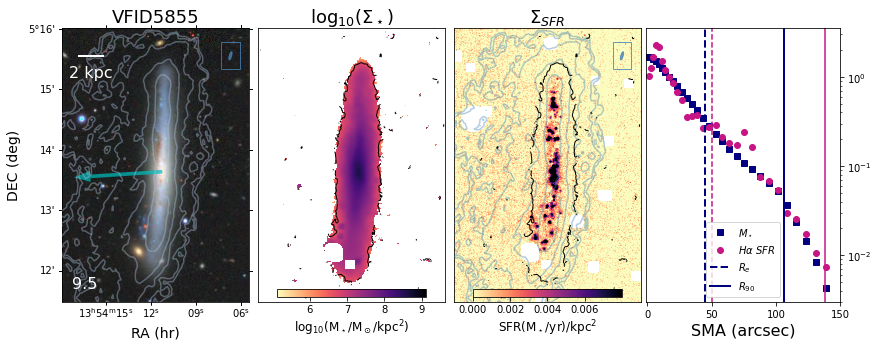

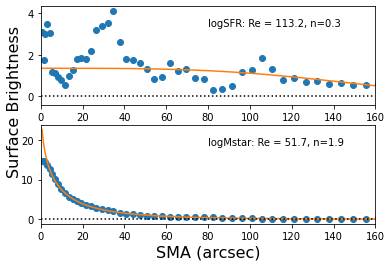

<Figure size 432x288 with 0 Axes>

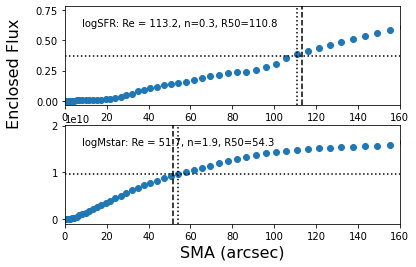

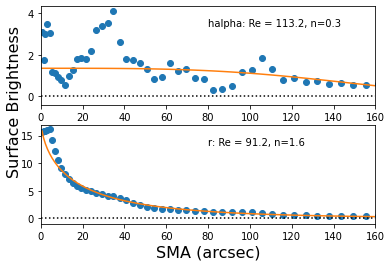

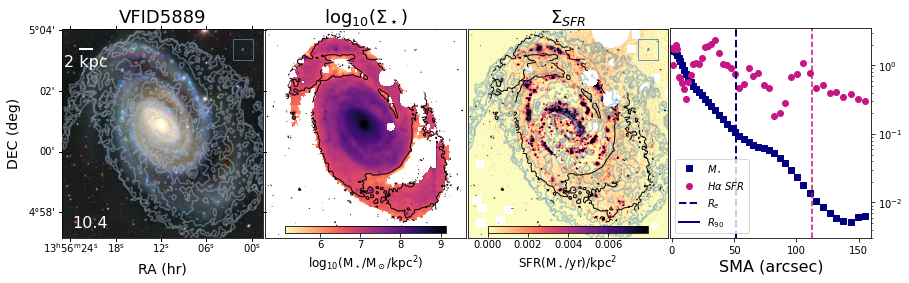

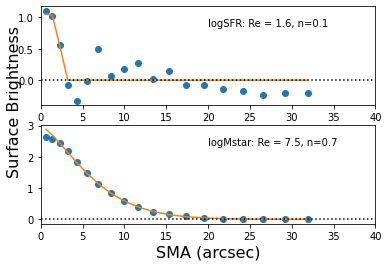

<Figure size 432x288 with 0 Axes>

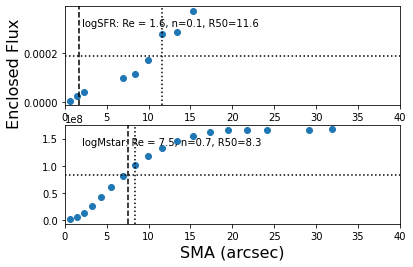

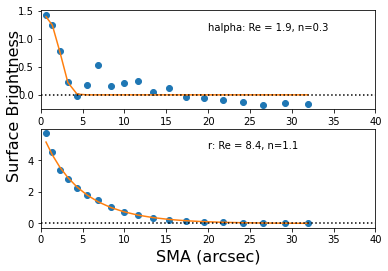

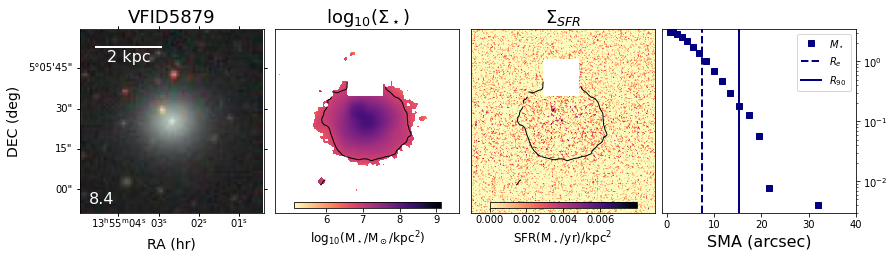

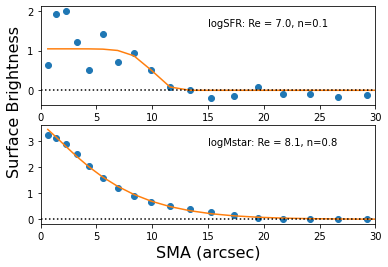

<Figure size 432x288 with 0 Axes>

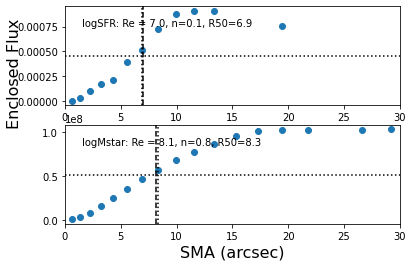

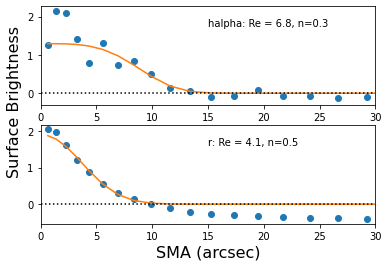

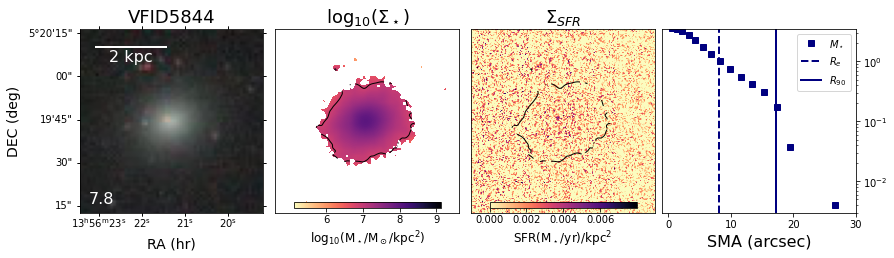

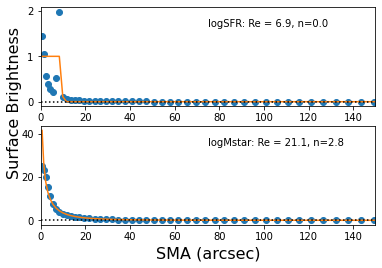

<Figure size 432x288 with 0 Axes>

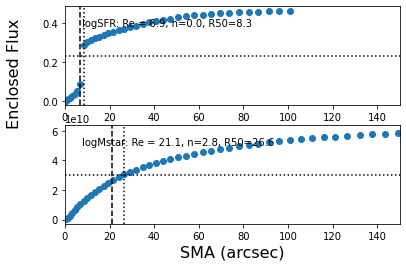

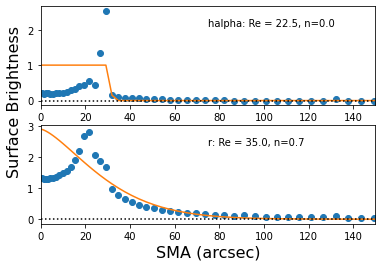

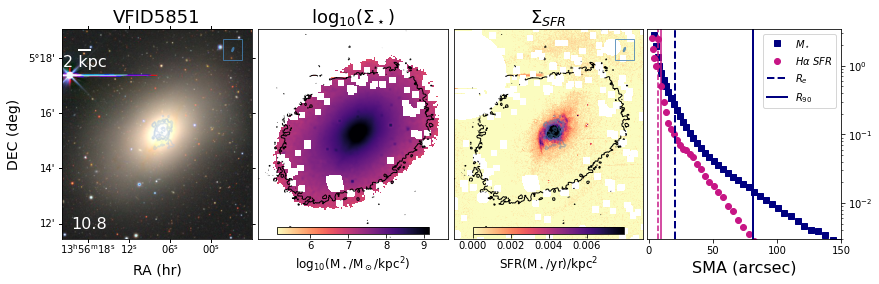

In [9]:
#from scipy.integrate import simpson
import os
%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py




scales = {'VFID5842':1.06,'VFID5844':1.03,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':.99,'VFID5889':1.0,'VFID5892':0.98}

rmax_dict = {'VFID5851':150,'VFID5842':120.,'VFID5859':20,'VFID5892':100,
         'VFID5855':150,'VFID5889':160,'VFID5844':30,'VFID5879':40}

harmax_dict = {'VFID5851':150,'VFID5842':120.,'VFID5859':20,'VFID5892':25,
         'VFID5855':150,'VFID5889':160,'VFID5844':30,'VFID5879':40}
#rmax = [160,120,20,100,200,220]



# testing for VFID5855 after updating the mask
alldirs = ['VFID5842-NGC5356-INT-20190206-p120',
           'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120',
           'VFID5892-NGC5360-INT-20190206-p120',
           'VFID5855-NGC5348-INT-20190206-p120',
           'VFID5889-NGC5364-INT-20190206-p120',
           'VFID5879-SDSSJ135502.70+050525.1-INT-20190206-p120',
           'VFID5844-SDSSJ135621.31+051944.2-INT-20190206-p120',
'VFID5851-NGC5363-INT-20190206-p120',]


for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #print("rmax = ",i,rmax[i])
    vfid = d.split('-')[0]
    logMstar = v.magphys['logMstar_med'][v.main['VFID'] == vfid][0]
    if logMstar < 0.1:
        logMstar = v.magphys['logMstar_best'][v.main['VFID'] == vfid][0]
    print(logMstar)
    logMstar_string = f"{logMstar:.1f}"
    print(f"logMstar = {logMstar_string}")
    #get_images(d,scalefactor=scales[d.split('-')[0]])
    
    #continue
    %run ~/github/havirgo/python/hafunctions.py
    
    print(rmax_dict[vfid])
    mfit,sfit,rfit,hfit = fit1profile(dirname=d,rmax=rmax_dict[vfid])
    
    # get R90 for mstar fit and sfr fit
    #I_mstar = 
    
    m90 = get_rad_fluxfrac(mfit,frac=0.9,verbose=True)
        
    s90 = get_rad_fluxfrac(sfit,frac=0.9,verbose=True)
    
    m50 = get_rad_fluxfrac(mfit,frac=0.5)
        
    s50 = get_rad_fluxfrac(sfit,frac=0.5)
    print(f"{d.split('-')[0]}: R90_mstar={m90:.1f}, R90_sfr={s90:.1f}, ratio={s90/m90:.2f} \n")
    print(f"{d.split('-')[0]}: R50_mstar={m50:.1f}, R50_sfr={s50:.1f}, ratio={s50/m50:.2f} \n")
    #plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=mfit.r_eff.value,Re_sfr=sfit.r_eff.value,R90_mstar=m90,R90_sfr=s90)
    plot_mstar_sfr_profiles(d,rmax=rmax_dict[vfid],Re_mstar=m50,Re_sfr=s50,R90_mstar=m90,R90_sfr=s90,logMstar=logMstar_string,vr=v.mw_vrcenter)

# Testing other color maps

In [ ]:
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
%run ~/github/havirgo/python/hafunctions.py
plot_mstar_sfr_profiles(dirname,rmax=200,cmap='inferno_r')

In [ ]:
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
%run ~/github/havirgo/python/hafunctions.py
plot_mstar_sfr_profiles(dirname,rmax=200,cmap='viridis_r')

In [ ]:
dirname = 'VFID5855-NGC5348-INT-20190206-p120'
%run ~/github/havirgo/python/hafunctions.py
ax1 = plot_mstar_sfr_profiles(dirname,rmax=150,cmap='magma_r',vr=v.mw_vrcenter)


In [ ]:
dirname = 'VFID5859-WISEAJ135504.45+051121.7-INT-20190206-p120'
%run ~/github/havirgo/python/hafunctions.py
ax1 = plot_mstar_sfr_profiles(dirname,rmax=150,cmap='magma_r',vr=v.mw_vrcenter)

# RPS Estimate for VFID5842

* Need to determine the truncation radius in physical units.
* then measure the enclosed stellar mass within that radius.
* assume the HI is also confined within that radius, and add the HI.
* get the CO mass from Gianluca.

* calculate the restoring force as (find exact relation)
* From Gunn & Gott (1972):

"If the galaxy is a typical spiral, this material will be held in the plane by
a force per unit area which cannot exceed
$$F/A = 2 \pi G\Sigma_* \Sigma_g ~~(G\&G, eqn ~62)$$
where $\Sigma_*$ is the star surface density and $\Sigma_g$ the gas surface density on the disk of the
galaxy.

* Q: what about dark matter??? - does not exert restoring force in z directioni b/c it's spherically symmetric.

In [73]:
%run ~/github/havirgo/python/hafunctions.py
from astropy.cosmology import WMAP9 as cosmo
from astropy import constants as c
from astropy import units as u

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

In [74]:
def get_FA(vcosmic,rtrunc, Rd, Mstar, logMH, MH2 = None):
    """
    calculate F/A restoring force at rtrunc
    
    PARAMS:
    vcosmic : redshift after correcting for flow 
    rtrunc : radius, in arcsec, where F/A is calculated
    rd : disk scale length, in arcsec
    Mstar : stellar mass (linear units)
    logMH : HI gas mass in log units
    MH2 : molecular gas mass in linear units; if none, then I assume MH2 = 0.3 MHI
    """
    from astropy.cosmology import WMAP9 as cosmo
    from astropy import constants as c
    from astropy import units as u
    H0 = cosmo.H0.value
    redshift = vcosmic/3.e5
    DA = cosmo.angular_diameter_distance(redshift) # Mpc per radian

    # convert rtrunc in arcsec
    rtrunc_Mpc = np.radians(rtrunc/3600)*DA
    print(rtrunc_Mpc.to('kpc'))
    

    Rd_Mpc =  np.radians(Rd/3600)*DA
    Rd_gas_Mpc = 1.7 * Rd_Mpc
    
    
    if MH2 is not None:
        Sigma_g = (10.**logMH+MH2)*c.M_sun/(2*np.pi*Rd_gas_Mpc.to('m')**2)* np.exp(-rtrunc/Rd)
    else:
        Sigma_g = 1.3*(10.**logMH)*c.M_sun/(2*np.pi*Rd_gas_Mpc.to('m')**2)* np.exp(-rtrunc/Rd)

    Sigma_star = Mstar*c.M_sun/(2*np.pi*Rd_Mpc.to('m')**2)* np.exp(-rtrunc/Rd)
    

    F_A = 2 * np.pi * c.G * Sigma_g * Sigma_star

    # print rd_kpc, rd_gas_kpc , 
    print(f"F_A = {F_A}")

    print()
    print("Pressure = ",F_A.to("N/m^2"))
    print("\nPressure = ",F_A.to("dyne/cm^2")," compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, \nfor large spiral (logMstar=11) ")
    return F_A  

In [115]:
vfids = ['VFID5842','VFID5892','VFID5889','VFID5855','VFID5859']
vfids = ['VFID5889','VFID5842','VFID5855','VFID5892','VFID5859']
# measure rtrunc from ds9
# VFID5859 - from outer region of HI, expand circle centered on galaxy
rtrunc_arcsec = {'VFID5842':50,'VFID5855':130.,'VFID5859': 37.,'VFID5889':203.,'VFID5892': 27.}


R50_arcsec = {'VFID5851':20.6, 'VFID5842': 36.6,'VFID5859': 8.1, \
                'VFID5892': 25.8, 'VFID5855':44.5, 'VFID5889':51.3, \
                'VFID5879': 7.5, 'VFID5844': 8.1}

# only need this for truncated galaxies, otherwise use the full Mstar
# these are measured from logmstar-vcosmic_phot.fits
mstar_enc = {'VFID5842':1.17e10,'VFID5892': 1.26e9}

# from Gautam, from Meerkat, with V_cosmic-based velocity and H0 = 74 (matching Castignani)
logMHI_enc = {'VFID5842':8.79,'VFID5855':8.98,'VFID5859': 7.84,'VFID5889':9.43,'VFID5892': 7.65}



In [159]:
FA = np.zeros(len(vfids),'d')


for i,vf in enumerate(vfids):
    print()
    print("#########################")
    print(vf)
    print("#########################")
    
    vfindex = np.arange(len(v.main))[v.main['VFID'] == vf][0]
    
    # get vcosmic
    vcosmic = v.env['Vcosmic'][vfindex]
    vcosmic = v.mw_Vcosmic_center
    # get mstar
    try:
        mstar = mstar_enc[vf]
    except KeyError:
        mstar = 10.**v.magphys['logMstar_med'][vfindex]*(v.env['Vcosmic'][vfindex]/v.main['vr'][vfindex])**2
    #print(mstar)
    # using full mstar for z direction of force, not just enclosed mass
    mstar = 10.**v.magphys['logMstar_med'][vfindex]*(vcosmic/v.main['vr'][vfindex])**2
    
    # check to see if Mmol is available from paper 1
    MH2 = v.paper1['Mmol'][vfindex]
    if MH2 == MH2:
        print("found MH2")
        
    else:
        MH2 = None
        print("found MH2")
        
    FA[i] = get_FA(vcosmic,rtrunc_arcsec[vf], 0.6*R50_arcsec[vf], mstar, logMHI_enc[vf], MH2 = MH2)
    

redshift = vcosmic/3.e5
DA = cosmo.angular_diameter_distance(redshift) # Mpc per radian
print() 
print("VFID     R50   Rtrunc logM* logMHI logMH2")
logMH2 = np.zeros(len(vfids))
logMHI = np.zeros(len(vfids))
logMstar = np.zeros(len(vfids))
R50 = np.zeros(len(vfids))
Rd_stars_Mpc = np.zeros(len(vfids))
Rd_gas_Mpc = np.zeros(len(vfids))
Rtrunc = np.zeros(len(vfids))
mstar = np.zeros(len(vfids))
for i,vf in enumerate(vfids):

    vfindex = np.arange(len(v.main))[v.main['VFID'] == vf][0]
    mstar[i] = 10.**v.magphys['logMstar_med'][vfindex]*(vcosmic/v.main['vr'][vfindex])**2
    MH2 = v.paper1['Mmol'][vfindex]

    logMHI[i] = logMHI_enc[vf]
    Rtrunc[i] = rtrunc_arcsec[vf]
    R50[i] = R50_arcsec[vf]
    Rd = 0.6*R50_arcsec[vf]
    Rd_stars_Mpc[i]  =  np.radians(Rd/3600)*DA.to('Mpc').value
    Rd_gas_Mpc[i] = 1.7 * Rd_stars_Mpc[i]
    if MH2 == MH2:
        #print("found MH2")
        print(f"{vf} {R50_arcsec[vf]:5.2f} {rtrunc_arcsec[vf]:6.2f} {np.log10(mstar[i]):5.2f} {logMHI_enc[vf]:5.2f}  {np.log10(MH2):.2f}")
        logMH2[i] = np.log10(MH2)
    else:
        MH2 = None
        print(f"{vf} {R50_arcsec[vf]:5.2f} {rtrunc_arcsec[vf]:6.2f} {np.log10(mstar[i]):5.2f} {logMHI_enc[vf]:5.2f}  {MH2}")
        logMH2[i] = np.log10(0.3*mstar[i])

        
# calculate F_A


Sigma_gas = (10.**logMHI+10.**logMH2)*c.M_sun/(2*np.pi*(Rd_gas_Mpc*u.Mpc)**2)* np.exp(-Rtrunc/(0.6*R50))

Sigma_star = mstar*c.M_sun/(2*np.pi*(Rd_stars_Mpc*u.Mpc)**2)* np.exp(-Rtrunc/(0.6*R50))#* np.exp(-Rtrunc/Rd)

F_A = np.zeros(len(vfids))
for i in range(len(vfids)):
    F_A[i] = (2 * np.pi * c.G * Sigma_gas[i] * Sigma_star[i]).to("dyne/cm^2").value
print(F_A)

logtotal_gas = np.log10((10.**logMHI+10.**logMH2))
colnames = ['VFID','R50','Rtrunc','Rd_stars_kpc','Rd_gas_kpc','logMstar',\
            'logMgas','exp(-Rtrunc/Rd)','Sigma_star','Sigma_gas','F_A','FA_function']

newtab = Table([vfids,R50,Rtrunc,Rd_stars_Mpc*1000,Rd_gas_Mpc*1000,np.log10(mstar),logtotal_gas,\
                np.exp(-1*Rtrunc/(0.6*R50)),Sigma_star.to('Msun/kpc^2'),Sigma_gas.to('Msun/kpc^2'),F_A,FA],names=colnames)

print(np.exp(-1*Rtrunc/(0.6*R50)))


#########################
VFID5889
#########################
found MH2
20.168676790922618 kpc
F_A = 3.343555611644312e-17 kg / (m s2)
Pressure =  3.343555611644312e-17 N / m2

Pressure =  3.3435556116443116e-16 dyn / cm2  compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, 
for large spiral (logMstar=11) 

#########################
VFID5842
#########################
found MH2
4.967654382000645 kpc
F_A = 1.1017030978531693e-13 kg / (m s2)
Pressure =  1.1017030978531693e-13 N / m2

Pressure =  1.1017030978531693e-12 dyn / cm2  compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, 
for large spiral (logMstar=11) 

#########################
VFID5855
#########################
found MH2
12.915901393201676 kpc
F_A = 6.472453761868791e-17 kg / (m s2)
Pressure =  6.472453761868791e-17 N / m2

Pressure =  6.472453761868792e-16 dyn / cm2  compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, 
for large spiral (logMstar=11) 

#########################
VFID5892
#########################
fo

In [160]:
newtab

<Table length=5>
  VFID     R50    Rtrunc ...          F_A                FA_function      
                         ...                                              
  str8   float64 float64 ...        float64                float64        
-------- ------- ------- ... ---------------------- ----------------------
VFID5889    51.3   203.0 ...  3.343555611644312e-16 3.3435556116443116e-16
VFID5842    36.6    50.0 ... 1.1017030978531699e-12 1.1017030978531693e-12
VFID5855    44.5   130.0 ...  6.472453761868792e-16  6.472453761868792e-16
VFID5892    25.8    27.0 ... 1.3095693327056404e-13   1.30956933270564e-13
VFID5859     8.1    37.0 ... 2.9713974096431238e-18  3.183541007101413e-18

In [148]:
10**10.5/(2*np.pi*3**2)*.001

559213.4678276337

Boselli+ review, figure 1, give electron density 2-6 e -4

for galaxy groups and clusters.  Groups from Sun+2009 have masses 1.4e13 < logM/h < 1.4e14 (corrected for H0=70)

In [86]:
ne = np.arange(2,7)*1.e-4
boselli_rho_icm = 1.15*ne*1.67e-24
print(boselli_rho_icm)

[3.8410e-28 5.7615e-28 7.6820e-28 9.6025e-28 1.1523e-27]


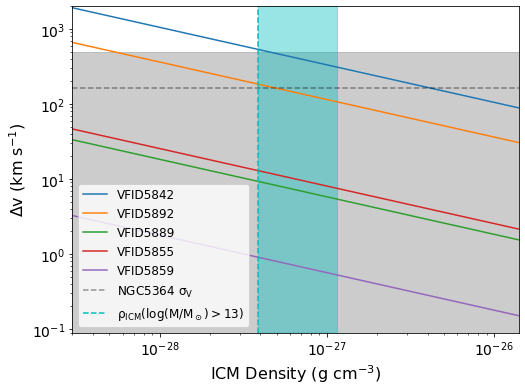

In [91]:
# make a graph of velocity vs rho ISM

sigma = v.bw_scale
plt.figure(figsize=(8,6))
logrho_icm = np.linspace(-29,-25.5,100)
for i,f in enumerate(FA):
    vel = np.sqrt(f/(10**logrho_icm))/1.e5
    plt.plot(10**logrho_icm,vel,label=vfids[i])
    
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.xlabel(r"$\rm {ICM} \ Density \ (g ~cm^{-3})$", fontsize=16)
plt.ylabel(r"$\rm \Delta v \ (km~ s^{-1})$", fontsize=16)


plt.axhline(y=sigma,c='k',ls='--',alpha=.4,label=r'$\rm NGC5364 ~\sigma_V$')
t = plt.xticks(fontsize=14)
t = plt.yticks(fontsize=14)
ymin=.09
ymax = 2000
plt.ylim(ymin,ymax)

xmin = 3.e-29
xmax = 1.4e-26

xfill = np.linspace(xmin,xmax,100)
sigma = v.bw_scale
plt.fill_between(xfill,3*sigma,color='0.5',alpha=.4)
plt.xlim(xmin,xmax)

# mark region where ICM density is expected at 0.4 Rvirial for groups and clusters

yfill = np.linspace(ymin,ymax,100)
plt.fill_betweenx(yfill,boselli_rho_icm[0],x2=boselli_rho_icm[-1],alpha=.4,color='c')
plt.axvline(x=boselli_rho_icm[0],label=r"$\rm \rho_{ICM}(log (M/M_\odot) > 13)$",ls='--',color='c')
plt.legend( prop={'size': 12})

# add vertical band for densities for groups from Boselli+2022 review paper

# rg - KT virial radius

plt.savefig(plotdir+"/RPS_calculation.png")
plt.savefig(plotdir+"/RPS_calculation.pdf")

### Keeping the original calculation

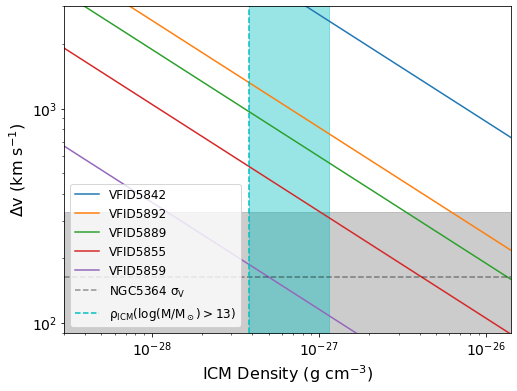

In [31]:
# make a graph of velocity vs rho ISM
sigma = v.bw_scale

plt.figure(figsize=(8,6))
logrho_icm = np.linspace(-30,-25.5,100)
for i,f in enumerate(FA):
    vel = np.sqrt(f/(10**logrho_icm))/1.e5
    plt.plot(10**logrho_icm,vel,label=vfids[i])
    
plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.xlabel(r"$\rm {ICM} \ Density \ (g ~cm^{-3})$", fontsize=16)
plt.ylabel(r"$\rm \Delta v \ (km~ s^{-1})$", fontsize=16)


plt.axhline(y=sigma,c='k',ls='--',alpha=.4,label=r'$\rm NGC5364 ~\sigma_V$')
t = plt.xticks(fontsize=14)
t = plt.yticks(fontsize=14)
ymin=90
ymax = 3000
plt.ylim(ymin,ymax)

xmin = 3.e-29
xmax = 1.4e-26

xfill = np.linspace(xmin,xmax,100)
sigma = v.bw_scale
plt.fill_between(xfill,2*sigma,color='0.5',alpha=.4)
plt.xlim(xmin,xmax)

# mark region where ICM density is expected at 0.4 Rvirial for groups and clusters

yfill = np.linspace(ymin,ymax,100)
plt.fill_betweenx(yfill,boselli_rho_icm[0],x2=boselli_rho_icm[-1],alpha=.4,color='c')
plt.axvline(x=boselli_rho_icm[0],label=r"$\rm \rho_{ICM}(log (M/M_\odot) > 13)$",ls='--',color='c')
plt.legend( prop={'size': 12})

# add vertical band for densities for groups from Boselli+2022 review paper

# rg - KT virial radius

plt.savefig(plotdir+"/RPS_calculation.png")
plt.savefig(plotdir+"/RPS_calculation.pdf")

In [ ]:
%run ~/github/havirgo/python/hafunctions.py


In [ ]:
v.paper1['Mmol'][6098]

In [ ]:
vfid = v.main['VFID'] == 'VFID5842'

In [ ]:
rtrunc = 60 # estimated from DS9, could do better here

### Get truncation radius

In [ ]:
datfile = homedir+'/research/Virgo-dev/cont-sub-gr/VFID5842-NGC5356-INT-20190206-p120/VFID5842-NGC5356-INT-20190206-p120-CS-gr_phot.fits'
from astropy.table import Table
phot = Table.read(datfile)

plt.figure()
plt.plot(phot['sma_arcsec'],phot['sb'],'bo')
#plt.xlim(40,70)
plt.axvline(x=rtrunc,label='Truncation Radius')
plt.legend()
plt.xlabel('SMA (arcsec)',fontsize=16)
plt.ylabel("Surface Brightness",fontsize=16)

### Convert truncation radius in kpc

In [ ]:
from astropy.cosmology import WMAP9 as cosmo
H0 = cosmo.H0.value

vfid = v.main['VFID'] == 'VFID5842'


redshift = v.env['Vcosmic'][vfid]/3.e5
DA = cosmo.angular_diameter_distance(redshift) # Mpc per radian

# convert rtrunc in arcsec

rtrunc_Mpc = np.radians(rtrunc/3600)*DA
print(rtrunc_Mpc.to('kpc'))


### Enclosed stellar mass for truncated galaxies

> NOTE: This is not relevant anymore.

In [ ]:
#datfile = homedir+'/research/Virgo-dev/cont-sub-gr/VFID5842-NGC5356-INT-20190206-p120/VFID5842-NGC5356-INT-20190206-p120-logmstar-vr_phot.fits'
datfile = homedir+'/research/Virgo-dev/cont-sub-gr/VFID5842-NGC5356-INT-20190206-p120/VFID5842-NGC5356-INT-20190206-p120-logmstar-vcosmic_phot.fits'
from astropy.table import Table
phot = Table.read(datfile)


plt.figure()
plt.plot(phot['sma_arcsec'],phot['flux'],'bo')
#plt.xlim(40,70)
plt.axvline(x=60,label='Truncation Radius')
plt.legend()
plt.xlabel('SMA (arcsec)',fontsize=16)
plt.ylabel("Enclosed Mass",fontsize=16)

plt.axhline(y=1.17e10)

flag  = phot['sma_arcsec'] < 60
enclosed_mstar = phot['flux'][flag][-1]
print("Stellar mass inside truncation radius = ",enclosed_mstar/1.e10)

In [ ]:
#datfile = homedir+'/research/Virgo-dev/cont-sub-gr/VFID5842-NGC5356-INT-20190206-p120/VFID5842-NGC5356-INT-20190206-p120-logmstar-vr_phot.fits'
datfile = homedir+'/research/Virgo-dev/cont-sub-gr/VFID5892-NGC5360-INT-20190206-p120/VFID5892-NGC5360-INT-20190206-p120-logmstar-vcosmic_phot.fits'
from astropy.table import Table
phot = Table.read(datfile)

rmax = rtrunc_arcsec['VFID5892']
plt.figure()
plt.plot(phot['sma_arcsec'],phot['flux'],'bo')
#plt.xlim(40,70)
plt.axvline(x=rmax,label='Truncation Radius')
plt.legend()
plt.xlabel('SMA (arcsec)',fontsize=16)
plt.ylabel("Enclosed Mass",fontsize=16)

#plt.axhline(y=1.17e10)

flag  = phot['sma_arcsec'] < rmax
enclosed_mstar = phot['flux'][flag][-1]
print("Stellar mass inside truncation radius = ",enclosed_mstar/1.e9)

### Get HI mass from A100

In [ ]:
vfid = v.main['VFID'] == 'VFID5842'
v.a100['logMH'][vfid]

### Calculate F/A

In [ ]:
from astropy import constants as c
from astropy import units as u

vfid = v.main['VFID'] == 'VFID5842'
logMH = v.a100['logMH'][vfid][0]

logMH = v.a100['logMH'][vfid][0]
print(logMH)
MH2 = v.paper1['Mmol'][vfid][0]
print("logMH2 = ",np.log10(MH2))

Sigma_g = (10.**logMH+MH2)*c.M_sun/(np.pi*rtrunc_Mpc.to('m')**2)

#Sigma_g = 10.**logMH*c.M_sun/(np.pi*rtrunc_Mpc.to('m')**2)
# scale by factor of 3 to include CO
#Sigma_g = 3 * Sigma_g
Sigma_star = enclosed_mstar*c.M_sun/(np.pi*rtrunc_Mpc.to('m')**2)

F_A = 2 * np.pi * c.G * Sigma_g * Sigma_star

print("VFID5842: F_A = ",F_A)

print("Pressure = ",F_A.to("N/m^2"))
print("\nPressure = ",F_A.to("dyne/cm^2")," compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, \nfor large spiral (logMstar=11) ")


In [ ]:
enclosed_mstar/1.e10

In [ ]:
Sigma_star.to("Msun/kpc^2")/1.e7

In [ ]:
print(logMH)
print(Sigma_g.to("Msun/kpc^2")/1.e7)

In [ ]:
print("Pressure = ",F_A.to("N/m^2"))
print("\nPressure = ",F_A.to("dyne/cm^2")," compared to 2.5E-11 from Gunn & Gott 1972 after eqn 62, \nfor large spiral (logMstar=11) ")

# so this is a factor of 5 less pressure than estimated for Coma

In [ ]:
1.7/2.5

In [ ]:
enclosed_mstar/1.e10

In [ ]:
v.groupMembs

In [ ]:
vel = v.bw_scale*u.km/u.s
rho_igm = F_A/vel**2
print(rho_igm.to('g/cm^3'))
print(rho_igm.to('g/cm^3')/c.m_p.to('g'))

In [ ]:
c.m_p.to('g')

In [ ]:
rtrunc_Mpc.to('kpc')

In [ ]:
c.G.to('kpc^3/Msun/s^2')*2*np.pi

In [ ]:
2*np.pi*c.G.to('cm^3/g/s^2')

In [ ]:
myval = 2.84e-38*u.Msun/u.kpc/u.s**2

In [ ]:
myval.to('g/cm/s^2')

In [ ]:
# Rasmussen formula


ne = 100*enclosed_mstar*(3*10**logMH[0]/(0.1*enclosed_mstar))*(1/rtrunc)**4
print(ne)

In [ ]:
print(rho_igm.to('g/cm^3')/1.75/c.m_p)

In [ ]:
6.4e-26/1.75/1.67e-24

In [ ]:
6.4*4

In [ ]:
.16*.03

## RPS Estimate for VFID5855

> NOTE: 
> EXPANDED THIS TO INCLUDE ALL GALAXIES (SEE ABOVE)

* Need to determine the truncation radius in physical units.
* then measure the enclosed stellar mass within that radius.
* assume the HI is also confined within that radius, and add the HI.
* get the CO mass from Gianluca.

* calculate the restoring force as (find exact relation)
* From Gunn & Gott (1972):

"If the galaxy is a typical spiral, this material will be held in the plane by
a force per unit area which cannot exceed
$$F/A = 2 \pi G\Sigma_* \Sigma_g ~~(G\&G, eqn ~62)$$
where $\Sigma_*$ is the star surface density and $\Sigma_g$ the gas surface density on the disk of the
galaxy.

* Q: what about dark matter??? - does not exert restoring force in z directioni b/c it's spherically symmetric.

In [ ]:
from astropy.cosmology import WMAP9 as cosmo
H0 = cosmo.H0.value


rtrunc = 130 # in arcsec, estimated from DS9,from center to northern extent of HI moment zero emission

vfid = v.main['VFID'] == 'VFID5855'


redshift = v.env['Vcosmic'][vfid]/3.e5
DA = cosmo.angular_diameter_distance(redshift) # Mpc per radian

# convert rtrunc in arcsec

rtrunc_Mpc = np.radians(rtrunc/3600)*DA
print(rtrunc_Mpc.to('kpc'))


In [ ]:
# because the HI extends beyond the stellar disk, use the total stellar mass as the enclosed mass
enclosed_mstar = 10.**v.magphys['logMstar_med'][vfid]
# correct for vr -> Vcosmic
enclosed_mstar = enclosed_mstar*(v.env['Vcosmic'][vfid]/v.main['vr'][vfid])**2
print("Stellar mass inside truncation radius = ",enclosed_mstar/1.e9)

In [ ]:
from astropy import constants as c
from astropy import units as u


vfid = v.main['VFID'] == 'VFID5855'

logMH = v.a100['logMH'][vfid][0]
print(logMH)
MH2 = v.paper1['Mmol'][vfid][0]
print("logMH2 = ",np.log10(MH2))

Sigma_g = (10.**logMH+MH2)*c.M_sun/(np.pi*rtrunc_Mpc.to('m')**2)
# scale by factor of 3 to include CO
#Sigma_g = 3 * Sigma_g
Sigma_star = enclosed_mstar*c.M_sun/(np.pi*rtrunc_Mpc.to('m')**2)

F_A = 2 * np.pi * c.G * Sigma_g * Sigma_star
print(F_A)
print(f"log10(F/A) = {np.log10(F_A.value)}")

In [ ]:
print(v.env['Vcosmic'][vfid])
print(v.main['vr'][vfid])

# Get distance to Virgo

In [ ]:
#from scipy.integrate import simpson
import os

%run ~/github/havirgo/python/hafunctions.py

#v.get_group_members()
#v.get_distance_Virgo()

In [ ]:
v.write_latex_table()

In [ ]:
np.mean(v.dist3dVirgo[v.groupMembs])

In [ ]:
v.env

In [ ]:
plt.figure(figsize=(12,6))
x = v.env['distSGX_Virgo']
y = v.env['distSGZ_Virgo']
c = v.env['distSGY_Virgo']
plt.scatter(v.env['distSGX_Virgo'],v.env['distSGZ_Virgo'],c=v.env['distSGY_Virgo'],alpha=.1,vmin=1,vmax=10,s=10)
plt.scatter(v.env['distSGX_Virgo'][v.groupMembs],v.env['distSGZ_Virgo'][v.groupMembs],c=v.env['distSGY_Virgo'][v.groupMembs],alpha=1,vmin=1,vmax=10,s=100)
plt.scatter(x[v.env['cluster_member']],y[v.env['cluster_member']],c=c[v.env['cluster_member']],alpha=.4,vmin=1,vmax=10,s=50,marker='s')
plt.colorbar()
plt.axis([-8,8,-8,8])

In [ ]:
plt.figure(figsize=(12,6))
x = v.main['RA']
y = v.main['DEC']
c = v.dist3dVirgo
plt.scatter(x,y,c='k',alpha=.1,vmin=1,vmax=10,s=8)
plt.scatter(x[v.groupMembs],y[v.groupMembs],c=c[v.groupMembs],alpha=1,vmin=1,vmax=10)
plt.scatter(x[v.env['cluster_member']],y[v.env['cluster_member']],c=c[v.env['cluster_member']],alpha=.4,vmin=1,vmax=10,s=50,marker='s',facecolors='none')
plt.colorbar(label="3D Distance (Mpc)")
plt.axis([160,220,-3,25])
plt.gca().invert_xaxis()
plt.xlabel("RA (deg)",fontsize=16)
plt.xlabel("DEC (deg)",fontsize=16)

In [ ]:
np.sum(v.main['NEDname'] == 'M87')

In [ ]:
# virgo cluster
RAvirgo,DECvirgo = 187.697083, 12.336944
vr = 1150
sigma=600
# phase space

dv = (v.main['vr']-vr)

dr = v.dist3dVirgo

plt.figure(figsize=(8,6))

y = dv/sigma
x = v.dist3dVirgo
c = v.dist3dVirgo

plt.scatter(x,y,c=c,alpha=.1,vmin=1,vmax=10)

plt.scatter(x[v.env['cluster_member']],y[v.env['cluster_member']],c='k',alpha=.3,vmin=1,vmax=24,s=50)
plt.scatter(x[v.groupMembs],y[v.groupMembs],c=c[v.groupMembs],alpha=1,vmin=1,vmax=24,s=100)


plt.colorbar(label="3D Distance (Mpc)")
plt.xlabel("$\Delta R_{3D}/R_{200}$",fontsize=16)
plt.ylabel("$\Delta v/\sigma$",fontsize=16)
plt.axis([-0.1,10,-5,5])
plt.axhline(ls='--',color='k',alpha=.5)

In [ ]:
print(f"number of group + cluster members = {np.sum(v.groupMembs & v.env['cluster_member'])}")
print(f"number of group + cluster members = {np.sum(v.groupMembs & v.env['mem_Mould00'])}")

In [ ]:
v.env

In [ ]:
# like Fig 3 in Castignani+2022b

# virgo cluster
RAvirgo,DECvirgo = 187.697083, 12.336944
vr = 1150
sigma=600
# phase space

dv = (v.main['vr'])

dr = np.sqrt((RAvirgo-v.main['RA'])**2 + (DECvirgo - v.main['DEC'])**2)

plt.figure(figsize=(8,6))

x = dr
y = dv
c = v.dist3dVirgo

plt.scatter(x,y,c='k',alpha=.1,vmin=1,vmax=10,s=6)

#plt.scatter(x[v.env['cluster_member']],y[v.env['cluster_member']],c=c[v.env['cluster_member']],alpha=.4,vmin=1,vmax=10,s=50,marker='*',label='Cluster member')
plt.scatter(x[v.env['cluster_member']],y[v.env['cluster_member']],alpha=.4,vmin=1,vmax=10,s=50,marker='*',label='Virgo Cluster members')
plt.scatter(x[v.groupMembs],y[v.groupMembs],c=c[v.groupMembs],alpha=1,vmin=1,vmax=10,s=100,label='NGC 5364 Group')
#plt.scatter(x[v.groupMembs],y[v.groupMembs],c='c',alpha=1,vmin=1,vmax=10,s=100,label='NGC 5364 Group')


plt.colorbar(label="3D Distance (Mpc)")
plt.xlabel("Angular Separation (deg)",fontsize=16)
plt.ylabel(r"$\rm v_r \ (km/s)$",fontsize=16)
plt.axis([-.2,26,-1000,3000])
plt.legend()
#plt.axhline(y=1100,ls='--',color='k',alpha=.5)



from astropy.cosmology import WMAP9 as cosmo

H0 = cosmo.H0.value

DA = cosmo.angular_diameter_distance(1100/3.e5)
DAperdeg = DA*np.pi/180
x1,x2 = plt.xlim()
print(x1,x2)

ax2 = plt.gca().twiny()

ax2.set_xlim(x1*DAperdeg.value,x2*DAperdeg.value)
ax2.set_xlabel("Angular Separation (Mpc)",fontsize=16)
plt.savefig(plotdir+'/NGC5364_Virgo_phasespace.png')

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
-0.2 26.0


<Figure size 432x288 with 0 Axes>

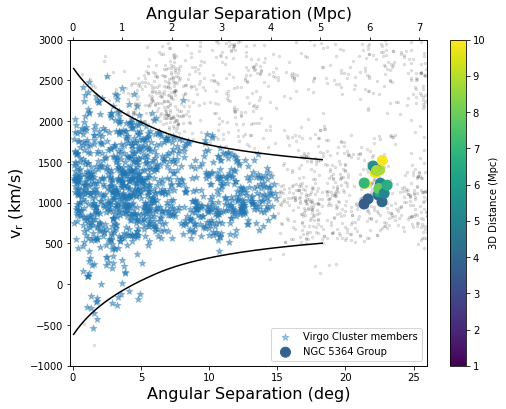

In [66]:
%run ~/github/havirgo/python/hafunctions.py

plot_phase_space(sepmax=25)


number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

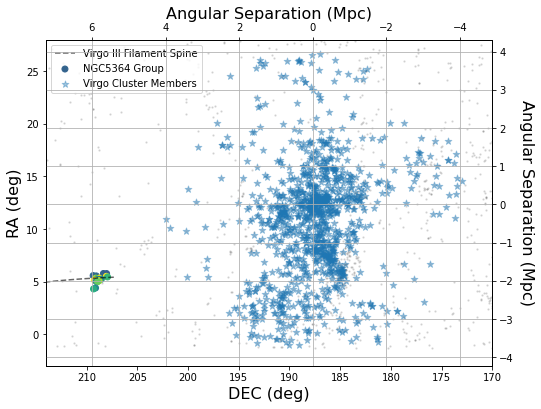

In [65]:
%run ~/github/havirgo/python/hafunctions.py

plot_sky_positions()

In [ ]:
from astropy.cosmology import WMAP9 as cosmo

H0 = cosmo.H0.value

DA = cosmo.angular_diameter_distance(1100/3.e5)

In [ ]:
15*DAperdeg

In [ ]:
np.sqrt(5.8**2+2**2)

### Location WRT large scale structure

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

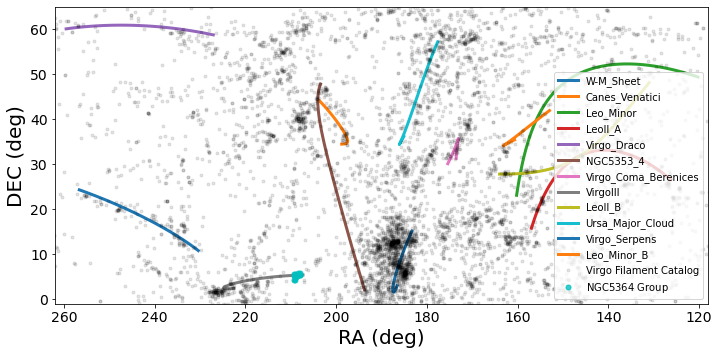

In [67]:
%run ~/github/havirgo/python/hafunctions.py
plot_sky_positions_with_filaments()

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

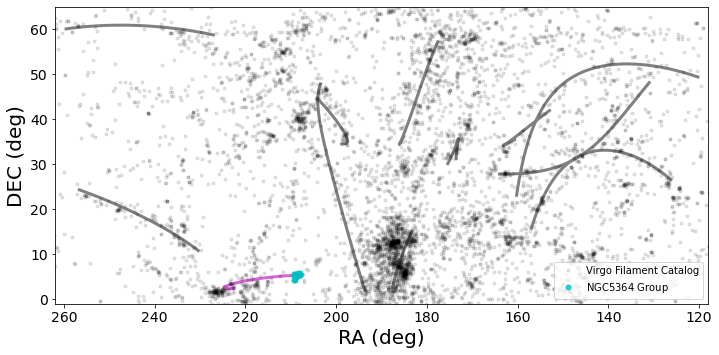

In [68]:
%run ~/github/havirgo/python/hafunctions.py
plot_sky_positions_with_filaments(multicolor=False,plotlegend=False)

In [ ]:
print(f"RA,DEC = {v.mw_RAcenter:.4f},{v.mw_DECcenter:.4f}")

In [ ]:
1/3600

In [ ]:
vfid='VFID5885'
ra = v.main['RA'][v.main['VFID'] == vfid]

In [ ]:
ra[0]

In [ ]:
np.log10(5.28e-02)

In [ ]:
np.log10(5.28e-02)-np.log10(7.34e+09)

# location of all group members relative to WFC footprint


In [ ]:
from astropy.table import Table
newtab = Table([v.main['VFID'],v.magphys['logMstar_best'],v.main['HAobsflag']])
newtab[v.groupMembs]

In [ ]:
# get the center of coadded image
flag = v.groupMembs & v.main['HAobsflag']
gindex = np.arange(len(v.main))[flag]
v.halpha['POINTING'][gindex[0]]

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


<Figure size 432x288 with 0 Axes>

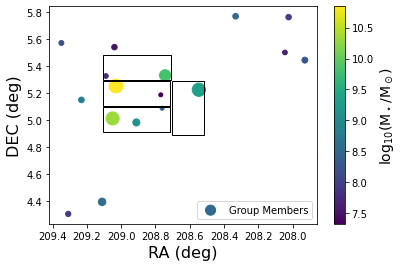

In [69]:
%run ~/github/havirgo/python/hafunctions.py
plt.figure(figsize=(6,4))

color = v.env['Vcosmic'][v.groupMembs]
color = v.main['vr'][v.groupMembs]
color = v.magphys['logMstar_best'][v.groupMembs]
size = v.magphys['logMstar_best'][v.groupMembs]
size = 50*np.e**(size-9)

# our size estimate for this one is way too big.
v.main['radius'][v.main['VFID']== 'VFID5802'] = 20.
size = 1.5*v.main['radius'][v.groupMembs]
plt.scatter(v.main['RA'][v.groupMembs],v.main['DEC'][v.groupMembs],c=color,s=size,label='Group Members')

hflag =  v.groupMembs & v.main['HAobsflag']
#plt.scatter(v.main['RA'][flag],v.main['DEC'][flag],c=v.magphys['logMstar_best'][flag],s=60)
ra_center = 208.91
dec_center =05.2
plot_INT_footprint(ra_center,dec_center)
cb = plt.colorbar(label='logMstar')
cb.set_label(label=r'$\rm \log_{10}(M_\star/M_\odot)$',fontsize=14)
#cb.set_label(label=r'$\rm V_{r} \ (km/s)$',fontsize=14)
plt.gca().invert_xaxis()
plt.xlabel("RA (deg)",fontsize=16)
plt.ylabel("DEC (deg)",fontsize=16)
plt.legend(loc='lower right')
plt.savefig(plotdir+"/INT_footprint_group_membs.png",dpi=300)
plt.savefig(plotdir+"/INT_footprint_group_membs.pdf")

In [5]:
gtab = Table(v.main['VFID','RA','DEC'][v.groupMembs],names=['name','RA','DEC'])
gtab.write(plotdir+'NGC5364_members_legacy_viewer.fits',overwrite=True)

In [ ]:
for i in range(np.sum(v.groupMembs)):
    print(v.main['VFID'][v.groupMembs][i],v.main['NEDname'][v.groupMembs][i],v.main['RA'][v.groupMembs][i],v.main['DEC'][v.groupMembs][i],size[i])

# how much SFR is elevated above the plane in VFID5855-NGC5348



In [ ]:
flux_above_plane = 0.01099
flux_on_plane = 0.05566
frac_above_plane = flux_above_plane/(flux_on_plane + flux_above_plane)


print(f"fraction of flux above plane = {frac_above_plane:.2f}")

# Schmidt-Kennicutt Calculation

want to try to estimate the effective radius of the HI profile for VFID5842.

In [ ]:
mom0 = HI_file['VFID5842']
print(mom0)

In [ ]:
hdu = fits.open(mom0)

In [ ]:
plt.imshow(hdu[0].data)

In [ ]:
sys.path.append(os.getenv("HOME")+'/github/halphagui/')

In [ ]:
import photwrapper

In [ ]:
e = photwrapper.ellipse(mom0)

In [ ]:
e.detect_objects()

In [ ]:
e.find_central_object()

In [ ]:
e.get_ellipse_guess()

In [ ]:
e.draw_guess_ellipse_mpl()

In [ ]:
e.measure_phot()

In [ ]:
e.draw_phot_results_mpl()

In [ ]:
e.calc_sb()

In [ ]:
(e.apertures_a)

In [ ]:
plt.figure()

# cutting off where signal is lost
flag = e.apertures_a < 30

x = e.apertures_a[flag]
y = e.flux1[flag]
sb = e.sb1[flag]
plt.plot(x,y)
print(len(x),len(y))
# get R50
fluxmax = np.max(y)

# interpolate to get 50% of flux

from scipy.interpolate import interp1d
N = 10
#x = np.linspace(0,40,100)
frac = 0.5
interp_profile = interp1d(y,x)
R50 = interp_profile(frac*fluxmax)
plt.axvline(R50,ls='--')
print(f"R50 = {R50:.1f}")
plt.axhline(y=0.5*fluxmax)

In [ ]:
# get scale factor to convert to mass
MHI = 10.**8.79 # from Gautam, MeerKAT
print(f"{MHI:.2e}")


scale_adu2msun = MHI/fluxmax

plt.plot(x,y*scale_adu2msun)

print(scale_adu2msun)

In [ ]:
e.pixel_scale
#8.33333333333E-04*3600

In [ ]:
e.apertures_a*e.pixel_scale

In [ ]:
sb_msun_sqpix = e.sb1*scale_adu2msun
sb_msun_sqarcsec = sb_msun_sqpix/(e.pixel_scale**2)

phys_scale = 60/7.7 # arcsec/kpc
phys_scale_arcsec_pc = phys_scale/1000 # arcsec/pc


sb_msun_sqpc =  sb_msun_sqarcsec * phys_scale_arcsec_pc**2
r_arcsec =  e.apertures_a*e.pixel_scale
r_kpc = e.apertures_a*e.pixel_scale/phys_scale

# should scale atomic to include molecular as well
plt.plot(r_arcsec,np.log10(sb_msun_sqpc*1.3), label=r"$\Sigma_{1.3 x HI}$")

plt.xlabel("Radius (arcsec)",fontsize=16)
plt.ylabel("$\log_{10}[\Sigma_{gas} \ (M_\odot~pc^{-2})]$",fontsize=16)
plt.axhline(y=0,c='k',ls='--',alpha=.5,label="SF threshold")
plt.axhline(y=.16,c='k',ls=':',alpha=.5,label=r"$\rm Outer \ \Sigma_{gas}$")

plt.axvline(x=60,c='purple',label=r"$\rm Outer \ extent \ of \ H\alpha$",alpha=.6)
plt.legend()

In outer region where SB drops suddenly but where gas is still detected, sb ~ 2 adu/sqarcsec (sum/sq arcsec), according to placing a region down in DS9 and getting statistics.  So let's see what this gives for a surface density of gas.

In [ ]:
ds9_sb_sqarcsec = 2
ds9_sb_msun_sqarcsec = ds9_sb_sqarcsec * scale_adu2msun

ds9_sb_msun_sqpc = ds9_sb_msun_sqarcsec * phys_scale_arcsec_pc**2

print((ds9_sb_msun_sqpc))
print(np.log10(ds9_sb_msun_sqpc))

In [ ]:
7.7/60*1000

In [ ]:
plt.figure()
plt.plot(x,sb)

In [ ]:
# get scale factor to convert to mass
MHI = 10.**8.79 # from Gautam, MeerKAT
print(f"{MHI:.2e}")


mass_integral = np.trapz(sb*2*np.pi*x,x=x)
print(mass_integral)

scale = MHI/mass_integral

# plot HImass profile

plt.figure()

plt.plot(x,scale*sb*2*np.pi*x)
plt.gca().set_yscale("log")

plt.ylabel("Mass/pix^2",fontsize=16)

In [ ]:
c.M_sun.to('g')

In [ ]:
# edge of profile is 1.5e5 at r=25, which is where brightness starts dropping
edge_sb = 1.5e5

# beyond that
edge_sb = 8e4

# Question for Greg
# maybe this is not mass per pixel^2.  Is it more mass per annulus area?
edge_sb_mass_sqarcsec = edge_sb/(e.pixel_scale**2)

phys_scale = 60/7.7 # arcsec/kpc
phys_scale_arcsec_pc = phys_scale/1000 # arcsec/pc

edge_sb_msun_sqpc = edge_sb_mass_sqarcsec*phys_scale_arcsec_pc**2

edge_sb_g_sqpc = edge_sb_msun_sqpc*1.988e33 # g/pc^2

In [ ]:
print(np.log(edge_sb_msun_sqpc))
print(edge_sb_g_sqpc)

https://ned.ipac.caltech.edu/level5/March15/Kennicutt/Figures/figure11.jpg

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def exponential(x,I0,Re):
    y = I0*np.exp(-x/Re)
    return y

In [ ]:
t = curve_fit(exponential,x,sb)

In [ ]:
t[0][1]/1.67

In [ ]:
yfit = exponential(x,t[0][0],t[0][1])

In [ ]:
plt.figure()
plt.plot(x,sb)
plt.plot(x,yfit)

In [ ]:
e.pixel_scale

In [ ]:
e.plot_profiles()
#plt.title("Moment Zero Image")

In [ ]:
np.sum(v.main['HAobsflag'])

# Adding CO Profiles

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial

####################################'
VFID5842
####################################'

9.957
logMstar = 10.0
VFID =  VFID5842
HIfilename =  /home/rfinn/research/Virgo/alma/2023/MeerKAT_ALMA_target_list/J1355_fin_lw05_bpcorr_5_mom0.fits
levels =  None
0.00478491238586 deg 0.19974645786715828 deg 0.023954929849330366 0.011258189135927294 155.276251206
COfilename =  /home/rfinn/research/Virgo/alma/combes_data/n5356-co10-mean.fits
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -32 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                  292                                                  NAX

<Figure size 432x288 with 0 Axes>

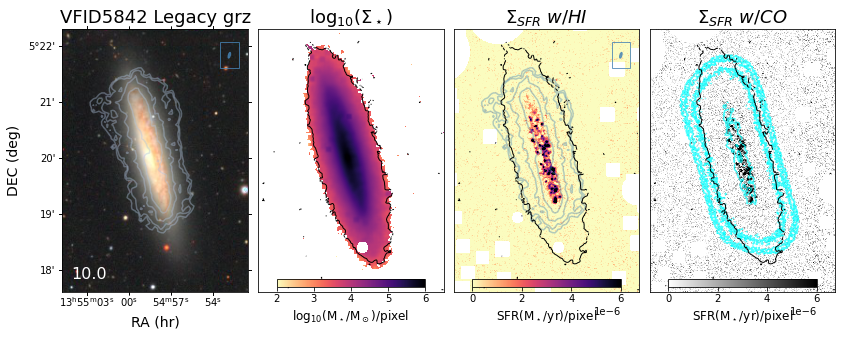

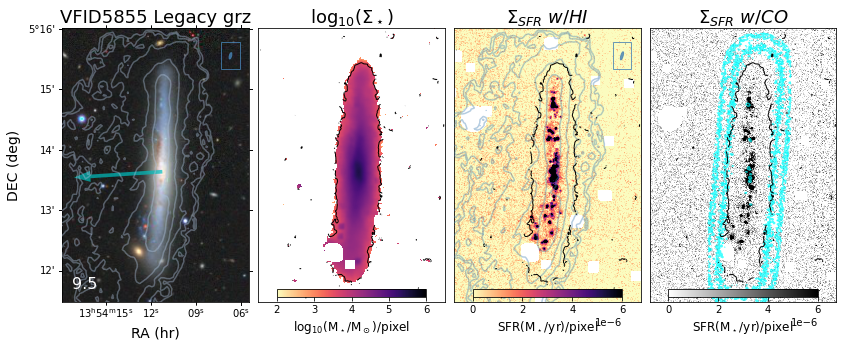

In [8]:
#from scipy.integrate import simpson
import os
%run ~/github/Virgo/programs/readtablesv2.py
%run ~/github/havirgo/python/hafunctions.py




scales = {'VFID5842':1.06,'VFID5844':1.03,'VFID5851':1,'VFID5855':1.07,
         'VFID5859':1.1,'VFID5869':1.0,'VFID5879':.99,'VFID5889':1.0,'VFID5892':0.98}

rmax_dict = {'VFID5851':160,'VFID5842':120.,'VFID5859':20,'VFID5892':100,
         'VFID5855':150,'VFID5889':220,'VFID5844':30,'VFID5879':40}
#rmax = [160,120,20,100,200,220]



# testing for VFID5855 after updating the mask
alldirs = ['VFID5842-NGC5356-INT-20190206-p120',
           'VFID5855-NGC5348-INT-20190206-p120',
           ]


for k,d in enumerate(alldirs):
    os.chdir(homedir+'/research/Virgo-dev/cont-sub-gr')
    print("\n####################################'")
    print(d.split('-')[0])
    print("####################################'")  
    print()
    #print("rmax = ",i,rmax[i])
    vfid = d.split('-')[0]
    logMstar = v.magphys['logMstar_med'][v.main['VFID'] == vfid][0]
    if logMstar < 0.1:
        logMstar = v.magphys['logMstar_best'][v.main['VFID'] == vfid][0]
    print(logMstar)
    logMstar_string = f"{logMstar:.1f}"
    print(f"logMstar = {logMstar_string}")
    #get_images(d,scalefactor=scales[d.split('-')[0]])
    
    #continue
    #%run ~/github/havirgo/python/hafunctions.py
    
    
    #mfit,sfit,rfit,hfit = fit1profile(dirname=d,rmax=rmax_dict[vfid])
    
    # get R90 for mstar fit and sfr fit
    #I_mstar = 
    
    #m90 = get_rad_fluxfrac(mfit,frac=0.9,verbose=True)
        
    #s90 = get_rad_fluxfrac(sfit,frac=0.9,verbose=True)
    
    #m50 = get_rad_fluxfrac(mfit,frac=0.5)
        
    #s50 = get_rad_fluxfrac(sfit,frac=0.5)
    
    #print(f"{d.split('-')[0]}: R90_mstar={m90:.1f}, R90_sfr={s90:.1f}, ratio={s90/m90:.2f} \n")
    #print(f"{d.split('-')[0]}: R50_mstar={m50:.1f}, R50_sfr={s50:.1f}, ratio={s50/m50:.2f} \n")
    #plot_mstar_sfr_profiles(d,rmax=rmax[k],Re_mstar=mfit.r_eff.value,Re_sfr=sfit.r_eff.value,R90_mstar=m90,R90_sfr=s90)
    plot_mstar_sfr_CO(d,rmax=rmax_dict[vfid],logMstar=logMstar_string,COcolor='cyan')

In [ ]:
homedir = os.getenv("HOME")
cofile = homedir+'/research/Virgo/alma/combes_data/n5356-co10-mean.fits'

In [ ]:
from astropy.io import fits
from matplotlib import pyplot as plt

In [ ]:
hdu = fits.open(cofile)

In [ ]:
plt.imshow(hdu[0].data[0])

In [ ]:
hdu[0].header

In [ ]:
for k in hdu[0].header.keywords:
    print(k)

In [ ]:
t = hdu[0].header

In [ ]:
del t['NAXIS3']

In [ ]:
t.cards[0][0]

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot(projection=t, slices=('x', 'y', 1))

In [ ]:
t[0]

In [ ]:
import spectral_cube

# Cutouts of group members not on halpha FOV


* want to add legacy, galex, and wise images
* need to download them

In [6]:
os.chdir('/media/rfinn/hdata2/NGC5364-paper')

In [7]:
homedir

'/home/rfinn'

In [8]:
sys.path.append(homedir+'/github/HalphaImaging/python3/')

In [9]:
import plot_cutouts_ha

In [14]:
# select group members that are not on halpha image
#from scipy.integrate import simpson
import os

%run ~/github/havirgo/python/hafunctions.py


number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial


In [13]:
groupNoha = ~v.main['HAobsflag'] & v.groupMembs
print(f"number of group members outside Halpha footprint = {np.sum(groupNoha)}")

number of group members outside Halpha footprint = 9


In [16]:
v.ephot['SMA_SB25'][groupNoha]

<Column name='SMA_SB25' dtype='float32' length=9>
33.507748
24.426222
28.151226
20.276787
30.589926
30.676687
 35.50157
 47.19696
28.843615

In [18]:

%run ~/github/havirgo/python/hafunctions.py

In [45]:
os.chdir('/media/rfinn/hdata2/NGC5364-paper/cutouts')


UNWISE_PIXSCALE = 2.75

# why am I using 1 arcsec for the legacy images???
LEGACY_PIXSCALE = 1
#LEGACY_PIXSCALE = 0.262

scale = 2*1.9
# making this smaller so I don't have to zoom
scale = 2*1.5
gindex = np.arange(len(v.main))[groupNoha]
topdir = os.getcwd()
for i in gindex:
    os.chdir(topdir)
    
    # galaxy properties
    vfid = v.main['VFID'][i]
    imsize_arcsec = scale*v.ephot['SMA_SB25'][i]
    ra = v.main['RA'][i]
    dec = v.main['DEC'][i]
    
    # make subdirectory for VFID
    if os.path.exists(vfid):
        os.chdir(vfid)
    else:
        os.mkdir(vfid)
        os.chdir(vfid)
    if not os.path.exists('galex'):
        os.mkdir('galex')
    if not os.path.exists('unwise'):
        os.mkdir('unwise')
          
    # get legacy image
    # get legacy grz color and fits
    legacy_imsize = imsize_arcsec/LEGACY_PIXSCALE
    print('requested legacy imsize = ',legacy_imsize)

    legacy_filename_r,legacy_jpegname = pch.get_legacy_images(ra,dec,galid=vfid,imsize=legacy_imsize,band='r',subfolder='legacy')
   
    # get unwise image
    wise_band = '3'
    wise_imsize = imsize_arcsec/UNWISE_PIXSCALE
    # check for coadds in unwise folder.  if they are there, then use these
    outimage = str(vfid)+'-unwise-w*-coadd.fits'
    coadds = glob.glob('unwise/'+outimage)
    if len(coadds) > 0:
        print('found unwise coadds')
        self.wise_filenames = [os.path.basename(f) for f in coadds]
        stdimage = str(vfid)+'-unwise-w*-coadd.std.fits'
        t = glob.glob('unwise/'+stdimage)
        wise_weightimages = [os.path.basename(f) for f in t]
        wise_multiframe_flag = True
    else:
        wise_filenames,wise_weightimages,wise_multiframe_flag = \
        pch.get_unwise_image(ra,dec,galid=vfid,pixscale='2.75',imsize=wise_imsize,bands=wise_band,subfolder='unwise')

    # get galex
    nuv_image_name = f'galex/{vfid}-nuv-{imsize_arcsec:.0f}.fits'
    if os.path.exists(nuv_image_name):
        nuv_image,h = fits.getdata(nuv_image_name,header=True)
        nuv_flag = True
        try:
            nuv_pscale = np.abs(h['CD1_1'])*3600
        except:
            print('WARNING: could not get galex pixelscale')
    else:
        cutout_hdu = pch.get_galex_image(ra,dec,imsize_arcsec)
        if cutout_hdu is not None:
            nuv_image = cutout_hdu.data
            nuv_flag = True
            fits.writeto(nuv_image_name,cutout_hdu.data,header=cutout_hdu.header,overwrite=True)
        else:
            nuv_flag = False

    

    

requested legacy imsize =  100.52324295043945
legacy imsize =  100
retrieving  legacy/VFID5764-legacy-100.jpg
http://legacysurvey.org/viewer/jpeg-cutout?ra=208.33264200000002&dec=5.7716873&layer=ls-dr9&size=100&pixscale=1
retrieving  legacy/VFID5764-legacy-100-r.fits
http://legacysurvey.org/viewer/cutout.fits?ra=208.33264200000002&dec=5.7716873&layer=ls-dr9&size=100&pixscale=1&bands=r
wise image size =  36
downloading unwise images
https://unwise.me/cutout_fits?version=allwise&ra=208.33264&dec=5.77169&size=36&bands=3
['unwise-2081p060-w3-img-m.fits', 'unwise-2081p060-w3-invvar-m.fits.gz', 'unwise-2081p060-w3-n-m.fits.gz', 'unwise-2081p060-w3-std-m.fits.gz']

Yoohoo!

requested legacy imsize =  73.27866554260254
legacy imsize =  73
retrieving  legacy/VFID5767-legacy-73.jpg
http://legacysurvey.org/viewer/jpeg-cutout?ra=208.02353549999998&dec=5.7650211&layer=ls-dr9&size=73&pixscale=1
retrieving  legacy/VFID5767-legacy-73-r.fits
http://legacysurvey.org/viewer/cutout.fits?ra=208.02353549999

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
###############################
VFID5764
###############################

VFID5764/galex/*nuv*.fits


<Figure size 432x288 with 0 Axes>

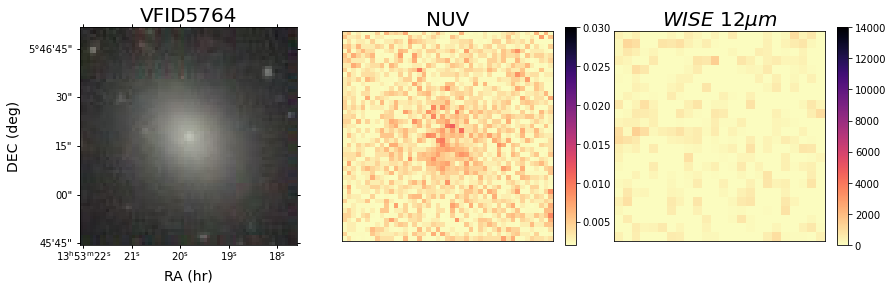

###############################
VFID5767
###############################

VFID5767/galex/*nuv*.fits


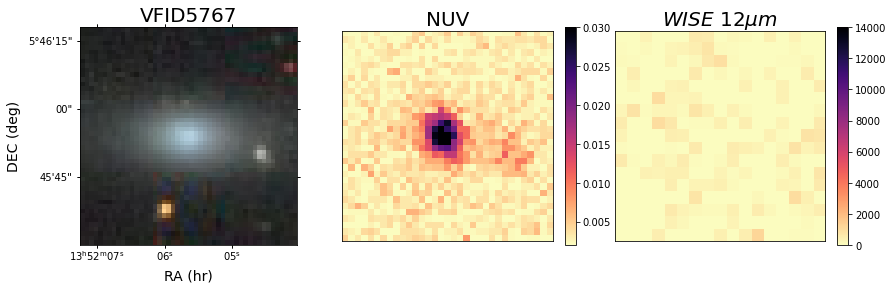

###############################
VFID5798
###############################

VFID5798/galex/*nuv*.fits


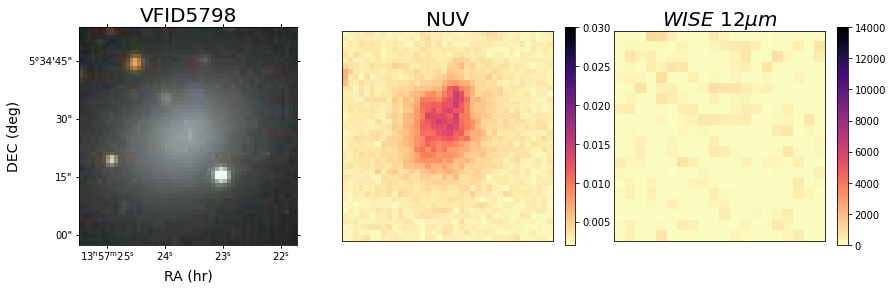

###############################
VFID5802
###############################

VFID5802/galex/*nuv*.fits


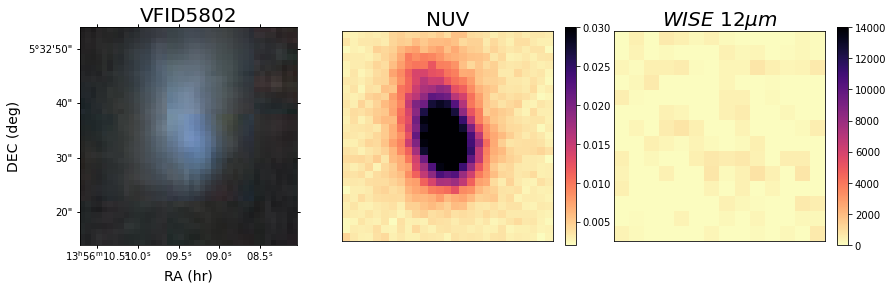

###############################
VFID5808
###############################

VFID5808/galex/*nuv*.fits


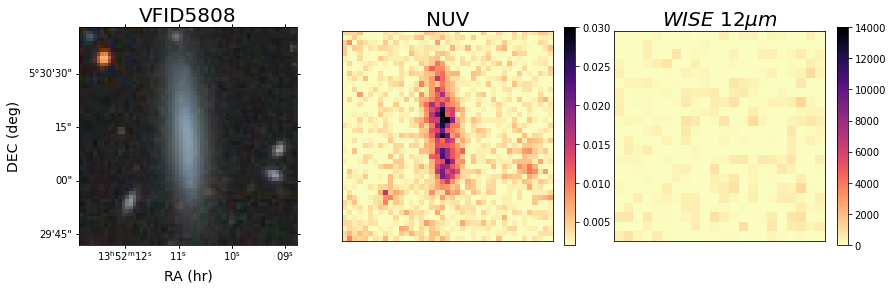

###############################
VFID5818
###############################

VFID5818/galex/*nuv*.fits


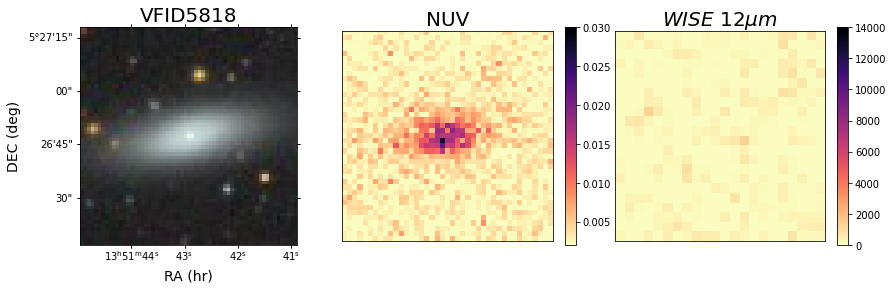

###############################
VFID5869
###############################

VFID5869/galex/*nuv*.fits


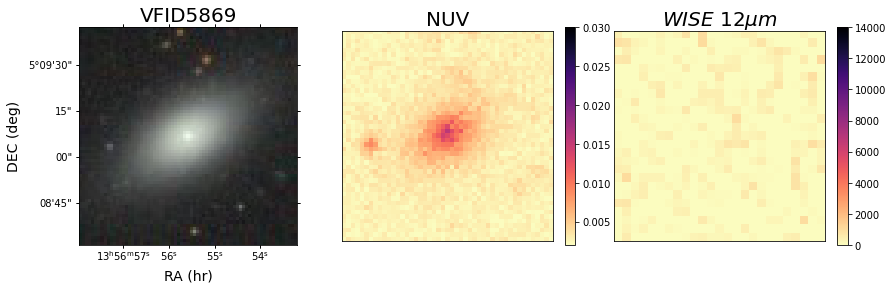

###############################
VFID5971
###############################

VFID5971/galex/*nuv*.fits


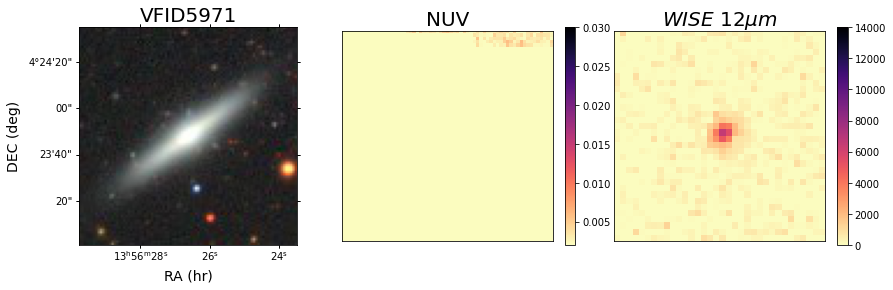

###############################
VFID5987
###############################

VFID5987/galex/*nuv*.fits


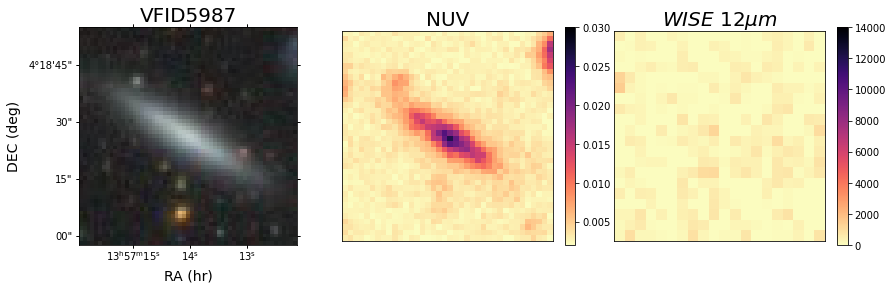

In [43]:
# plot images

                
                
# plot legacy, galex, unwise W3
%run ~/github/havirgo/python/hafunctions.py
os.chdir('/media/rfinn/hdata2/NGC5364-paper/cutouts')

gindex = np.arange(len(v.main))[groupNoha]
topdir = os.getcwd()
for i in gindex:
    # galaxy properties
    dirname = v.main['VFID'][i]
    print('###############################')
    print(dirname)
    print('###############################')
    plot_sfr_indicators_nohalpha(dirname,figsize=[14,4],cbfrac=.06,xticks=False)

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
number of group members outside Halpha footprint = 9
###############################
VFID5764
###############################

VFID5764/galex/*nuv*.fits
adding logMstar =  8.532


<Figure size 432x288 with 0 Axes>

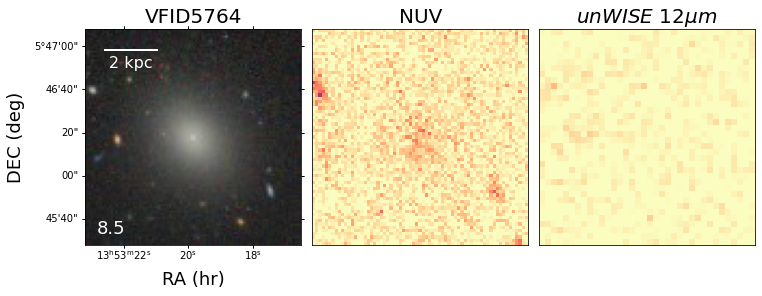

###############################
VFID5767
###############################

VFID5767/galex/*nuv*.fits
adding logMstar =  7.962


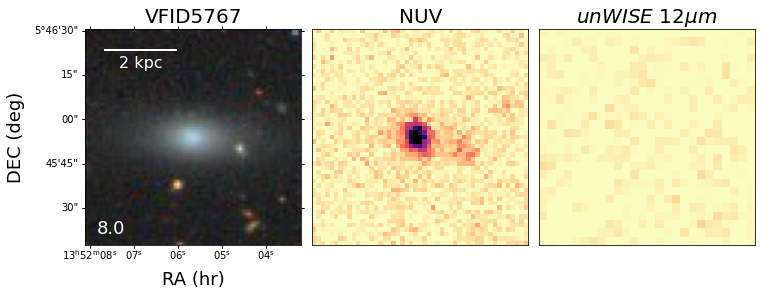

###############################
VFID5798
###############################

VFID5798/galex/*nuv*.fits
adding logMstar =  8.237


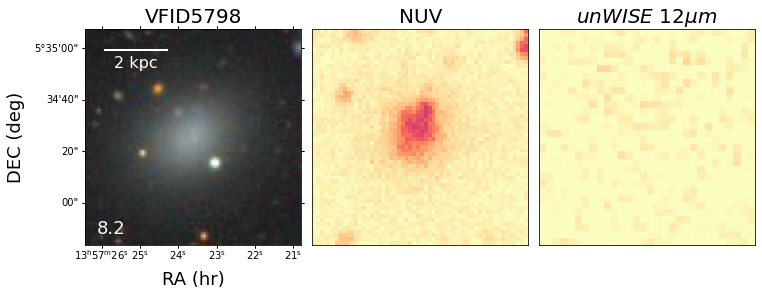

###############################
VFID5802
###############################

VFID5802/galex/*nuv*.fits
adding logMstar =  7.512


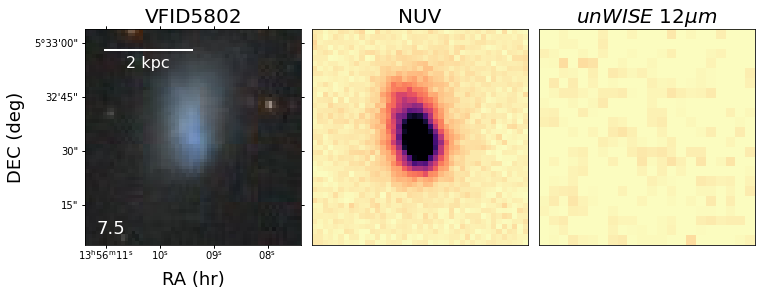

###############################
VFID5808
###############################

VFID5808/galex/*nuv*.fits
adding logMstar =  7.722


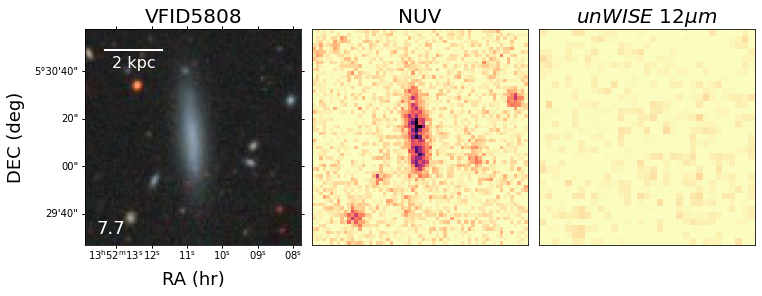

###############################
VFID5818
###############################

VFID5818/galex/*nuv*.fits
adding logMstar =  8.522


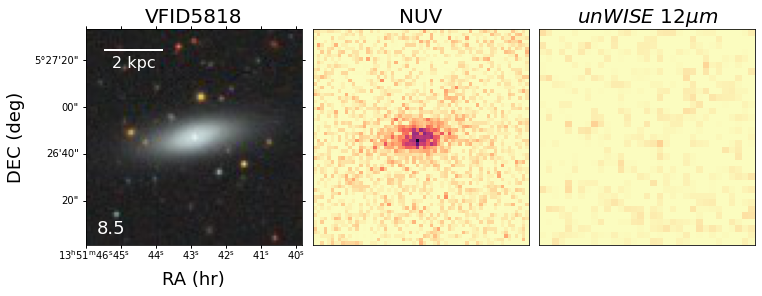

###############################
VFID5869
###############################

VFID5869/galex/*nuv*.fits
adding logMstar =  8.827


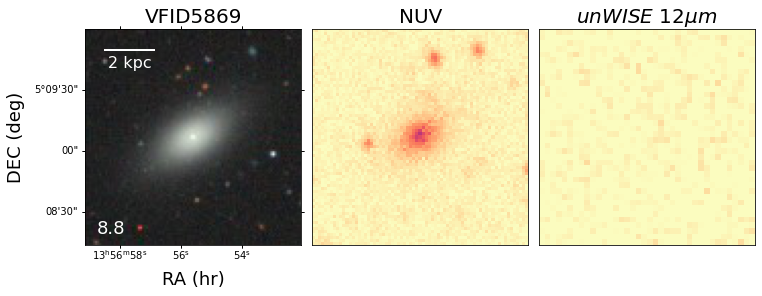

###############################
VFID5971
###############################

VFID5971/galex/*nuv*.fits
adding logMstar =  8.732


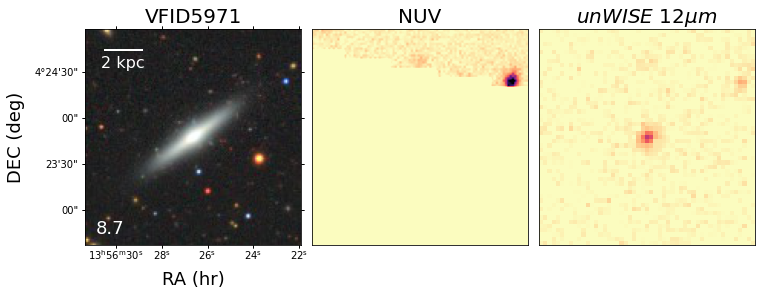

###############################
VFID5987
###############################

VFID5987/galex/*nuv*.fits
adding logMstar =  8.037


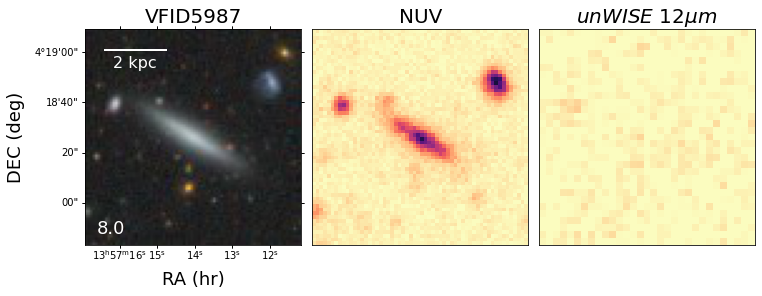

In [18]:
# plot images

                
                
# plot legacy, galex, unwise W3
%run ~/github/havirgo/python/hafunctions.py

groupNoha = ~v.main['HAobsflag'] & v.groupMembs
print(f"number of group members outside Halpha footprint = {np.sum(groupNoha)}")

os.chdir('/media/rfinn/hdata2/NGC5364-paper/cutouts')

gindex = np.arange(len(v.main))[groupNoha]
topdir = os.getcwd()
for i in gindex:
    # galaxy properties
    dirname = v.main['VFID'][i]
    print('###############################')
    print(dirname)
    print('###############################')
    logmstar = v.combinedMass[i]
    plot_sfr_indicators_nohalpha(dirname,figsize=[12,4],cbfrac=.06,xticks=False,logMstar=logmstar,contourFlag=False)

# Table for group galaxies off the halpha image

In [19]:
# plot legacy, galex, unwise W3
%run ~/github/havirgo/python/hafunctions.py

v.write_latex_table_nohalpha()

number of Kourkchi group members = 17
distance to Virgo = 6.7 (6.3) +/- 2.7
Vcosmic: biweight location (scale) = 1425.5 (374.2)
vr: biweight location (scale) = 1236.5 (163.8)
average separation of Halpha FOV galaxies from center is 0.374 Rvirial
distance to Virgo = 6.7 (6.3) +/- 2.7


<Figure size 432x288 with 0 Axes>